In [1]:
import anthropic
import pandas as pd
from tqdm import tqdm
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [10]:
pip show matplotlib

Name: matplotlib
Version: 3.8.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /opt/anaconda3/lib/python3.11/site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn, stable_baselines3, statannotations
Note: you may need to restart the kernel to use updated packages.


In [ ]:
client = anthropic.Client(api_key="your_api_key")



## Generate Dataframe for Correct and Incorrect Information

In [18]:
# helper function to add the step number and error type on the dataframe
def add_step_num_error_type(df, error_type:str):
    transformed_solutions = df['transformed_solution']
    step_num_lst = [len(solution.split('\n'))-1 for solution in transformed_solutions]
    df['num_steps'] = step_num_lst
    df['error_type'] = [error_type]*len(df)
    return df
    

In [20]:
###### load data Calculation Error#########
df_CA = pd.read_json('cleaned_json_input/CA/generated_cases_clean.jsonl', lines=True)
# transformation (adding the number of steps and the error type)
df_CA_step_added = add_step_num_error_type(df_CA,'CA')
df_CA_transformed = df_CA_step_added[df_CA_step_added['num_steps'].notna()].sort_values(by='num_steps',ascending=False).head(50).sample(frac=1, random_state=42).reset_index(drop = True)
df_CA_transformed['internal_num'] = list(range(1, 51))

###### load data Counting Error#########
df_CO= pd.read_json('cleaned_json_input/CO/generated_cases_clean.jsonl', lines=True)
# transformation (adding the number of steps and the error type)
df_CO_step_added = add_step_num_error_type(df_CO,'CO')
df_CO_transformed = df_CO_step_added[df_CO_step_added['num_steps'].notna()].sort_values(by='num_steps',ascending=False).head(50).sample(frac=1, random_state=42).reset_index(drop = True)
df_CO_transformed['internal_num'] = list(range(1, 51))

###### load data Contradictory Step#########
df_CS= pd.read_json('cleaned_json_input/CS/generated_cases_clean.jsonl', lines=True)
# transformation (adding the number of steps and the error type)
df_CS_step_added= add_step_num_error_type(df_CS,'CS')
df_CS_transformed = df_CS_step_added[df_CS_step_added['num_steps'].notna()].sort_values(by='num_steps',ascending=False).head(50).sample(frac=1, random_state=42).reset_index(drop = True)
df_CS_transformed['internal_num'] = list(range(1, 51))


###### load data Context Value Error#########
df_CV= pd.read_json('cleaned_json_input/CV/generated_cases_clean.jsonl', lines=True)
# transformation (adding the number of steps and the error type)
df_CV_step_added = add_step_num_error_type(df_CV,'CV')
df_CV_transformed = df_CV_step_added[df_CV_step_added['num_steps'].notna()].sort_values(by='num_steps',ascending=False).head(50).sample(frac=1, random_state=42).reset_index(drop = True)
df_CV_transformed['internal_num'] = list(range(1, 51))


###### load data Formula Confusion Error#########
df_FC= pd.read_json('cleaned_json_input/FC/generated_cases_clean.jsonl', lines=True)
# transformation (adding the number of steps and the error type)
df_FC_step_added = add_step_num_error_type(df_FC,'FC')
df_FC_transformed = df_FC_step_added[df_FC_step_added['num_steps'].notna()].sort_values(by='num_steps',ascending=False).head(50).sample(frac=1, random_state=42).reset_index(drop = True)
df_FC_transformed['internal_num'] = list(range(1, 51))


###### load data Hallucination Error#########
df_HA= pd.read_json('cleaned_json_input/HA/generated_cases_clean.jsonl', lines=True)
# transformation (adding the number of steps and the error type)
df_HA_step_added  = add_step_num_error_type(df_HA,'HA')
df_HA_transformed = df_HA_step_added[df_HA_step_added['num_steps'].notna()].sort_values(by='num_steps',ascending=False).head(50).sample(frac=1, random_state=42).reset_index(drop = True)
df_HA_transformed['internal_num'] = list(range(1, 51))


###### load data Missing Step Error#########
df_MS= pd.read_json('cleaned_json_input/MS/generated_cases_clean.jsonl', lines=True)
# transformation (adding the number of steps and the error type)
df_MS_step_added = add_step_num_error_type(df_MS,'MS')
df_MS_transformed = df_MS_step_added[df_MS_step_added['num_steps'].notna()].sort_values(by='num_steps',ascending=False).head(50).sample(frac=1, random_state=42).reset_index(drop = True)
df_MS_transformed['internal_num'] = list(range(1, 51))


###### load data Operator Error#########
df_OP= pd.read_json('cleaned_json_input/OP/generated_cases_clean.jsonl', lines=True)
# transformation (adding the number of steps and the error type)
df_OP_step_added = add_step_num_error_type(df_OP,'OP')
df_OP_transformed = df_OP_step_added[df_OP_step_added['num_steps'].notna()].sort_values(by='num_steps',ascending=False).head(50).sample(frac=1, random_state=42).reset_index(drop = True)
df_OP_transformed['internal_num'] = list(range(1, 51))


###### load data Unit Conversion Error#########
df_UC= pd.read_json('cleaned_json_input/UC/generated_cases_clean.jsonl', lines=True)
# transformation (adding the number of steps and the error type)
df_UC_step_added = add_step_num_error_type(df_UC,'UC')
df_UC_transformed = df_UC_step_added[df_UC_step_added['num_steps'].notna()].sort_values(by='num_steps',ascending=False).head(50).sample(frac=1, random_state=42).reset_index(drop = True)
df_UC_transformed['internal_num'] = list(range(1, 51))


# combine the dataframe:
error_frames = [df_CA_transformed, df_CO_transformed, df_CS_transformed, df_CV_transformed, df_FC_transformed, df_HA_transformed, df_MS_transformed, df_OP_transformed, df_UC_transformed]

combined_frames = pd.concat(error_frames).reset_index(drop=True)
combined_frames['wrong_type'] = "wrong"

df_right = combined_frames.sample(n=50,random_state=42)
df_right['wrong_step'] = 0
df_right['wrong_type'] = "right"
df_right['error_type'] = "NA"
df_right['internal_num'] = list(range(1, 51))

total_frames = [combined_frames, df_right]
total_combined_frames = pd.concat(total_frames).reset_index(drop=True)

# check the distribution of the errores: 
category_counts = total_combined_frames['error_type'].value_counts()
category_counts


error_type
CA    50
CO    50
CS    50
CV    50
FC    50
HA    50
MS    50
OP    50
UC    50
NA    50
Name: count, dtype: int64

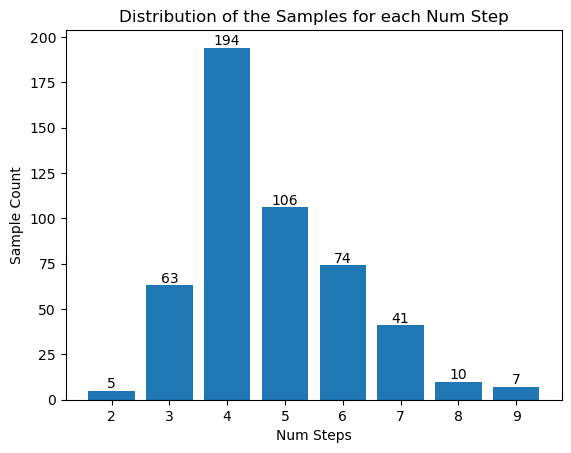

In [23]:
counts = total_combined_frames['num_steps'].value_counts()
fig, ax = plt.subplots()
bars = ax.bar(counts.index, counts.values)

# Add labels
ax.bar_label(bars)

plt.xlabel('Num Steps')
plt.ylabel('Sample Count')
plt.title('Distribution of the Samples for each Num Step')
plt.show()

## Tagged Information Generation

In [ ]:
sample_tag = """
## 1. Problem statement

James is building a hall of mirrors. Three of the walls will be completed covered with glass. If <fact1>two of those walls are 30 feet by 12 feet</fact1> and <fact2>the third is 20 feet by 12 feet</fact2>, how many square feet of glass does he need?

## 2. Facts

<fact1>Two walls dimensions: 30 feet by 12 feet</fact1>
<fact2>Third wall dimensions: 20 feet by 12 feet</fact2>

## 3. Steps

<step1> First find the area of one of the long walls </step1>
<formula> length × width </formula>
<calculation> 30 feet * 12 feet = 360 square feet </calculation>
<var> long_wall_area : 360 square feet </var>

<step2> Then double that amount since there are two walls </step2>
<formula> long_wall_area × 2 </formula>
<calculation> 360 square feet * 2 = 720 square feet </calculation>
<var> two_long_walls_area : 720 square feet </var>

<step3> Then find the area of the short wall </step3>
<formula> length × width </formula>
<calculation> 20 feet * 12 feet = 240 square feet </calculation>
<var> short_wall_area : 240 square feet </var>

<step4> Then add that area to the area of the two long walls to find the total area </step4>
<formula> two_long_walls_area + short_wall_area </formula>
<calculation> 720 square feet + 240 square feet = 960 square feet </calculation>
<var> total_glass_area : 960 square feet </var>

## 4. Wrongsteps

<wrongstep> 0 </wrongstep>

## 5. Output

<output> 960 </output>
"""

In [ ]:
class Tag_Generation:
    def __init__(self, problem_statement:str, wrong_step:int , raw_cot:str , problem_type: str,  tag_sample: str ):
        self.problem_statement = problem_statement
        self.problem_type = problem_type
        self.wrongstep = wrong_step
        self.raw_cot = raw_cot
        self.tag_sample = tag_sample
        self.line_list = self.raw_cot.split("\n")
    def get_prompt(self):
        prompt = f"""
            You are given a {self.problem_type} problem: {self.problem_statement}
            You are also given my answer, which you need refer to and must not attempt to verify or change, the answer is composed of different steps and the steps have been divided and put into this list: {self.line_list[:-1]}
            Important:there might be some mistakes in my answer, but please do not try to fix it, leave it as it is and pretend it is true. Do not mention it anywhere in the solution.
            The wrong step for this questions is Step:{self.wrongstep}
            Your task is only to re-format my answer according to the four sections below. Do not solve the problem yourself and do not correct any possible mistakes.
            1. Problem statement
            State the problem. Tag every numeric fact with <fact1> ... </fact1>, <fact2>...</fact2>, etc. Use a tag only for information that contains a number.
            For example: <fact1> Cost of shirts: $50 </fact1>
            2. Facts
            List each parsed fact as a variable description, re-using the same tags. *Example* (do **not** change): > Facts: > <fact1>Starting sapphires: 8</fact1> > <fact2>Sapphires traded: 3</fact2> > …  Make sure only numeric value is allowed on the right side of the colon within the fact tags. 
            3.Steps
            My answer is already divided into steps and put into a list. Provide exactly the same number of steps in this section as the number of steps provided in the list. For each step write:
            <stepX> concise description of the step </stepX>  (do not display any calculation or formula between stepX tags, it should be purely description of the step.)
            <formula> formula shown, blank if none </formula>
            <calculation> numbers shown, blank if none. The calculation need to stay consistent with the information in the description at that step. Do not try to change the number or fix the number</calculation>
            <var> intermediate variable </var>  the number variable in this step depends on how many variables are needed, make sure for all the variable the same tag <var>... </var> is used. Also use consistent variable names across steps. Example: <var>t_shirt_income : $10</var>
            4.Wrongsteps
            This discribe the wrong step that appears in the explanation steps. it was being provided earlier in the prompt. it should only contain the integer of the wrong step with tag e.g.  <wrongstep> 2 </wrongstep>
            5.Output
            The final answer is {self.line_list[-1].lstrip('#')}, copy the final numerical result from my answer and put it inside <output> tags, for example <output>600</output>. 
            #############
            Here is a tag sample:{self.tag_sample}
            """
        return prompt

In [ ]:
# wrong questions: 
for i in range(len(total_combined_frames)):
    if total_combined_frames['wrong_type'][i] == 'wrong':
        tag_generation = Tag_Generation(problem_statement = total_combined_frames['question'][i], wrong_step = total_combined_frames['wrong_step'][i],  raw_cot = total_combined_frames['transformed_solution'][i], problem_type = "GSM8K", tag_sample = sample_tag)
    else:
        tag_generation = Tag_Generation(problem_statement = total_combined_frames['question'][i], wrong_step = total_combined_frames['wrong_step'][i],  raw_cot = total_combined_frames['original_solution'][i], problem_type = "GSM8K", tag_sample = sample_tag)
    tag_prompt = tag_generation.get_prompt()
    with open(f"tags/tag_generation_{total_combined_frames['wrong_type'][i]}_{total_combined_frames['error_type'][i]}_{total_combined_frames['internal_num'][i]}.txt", "w", encoding="utf-8") as f:
        with client.messages.stream(
            model="claude-3-7-sonnet-20250219",
            max_tokens=64000,
            temperature=0.2,
            messages=[{"role": "user", "content": tag_prompt}],
        ) as stream:    
            for text in stream.text_stream:
                f.write(text) 

In [ ]:
# right explanation for the CA error:  
for i in range(50):
    tag_generation = Tag_Generation(problem_statement = total_combined_frames['question'][i], wrong_step = total_combined_frames['wrong_step'][i],  raw_cot = total_combined_frames['original_solution'][i])
    tag_prompt = tag_generation.get_prompt()
    with open(f"tags/tag_generation_right_{total_combined_frames['error_type'][i]}_{total_combined_frames['internal_num'][i]}.txt", "w", encoding="utf-8") as f:
        with client.messages.stream(
            model="claude-3-7-sonnet-20250219",
            max_tokens=64000,
            temperature=0.2,
            messages=[{"role": "user", "content": tag_prompt}],
        ) as stream:    
            for text in stream.text_stream:
                f.write(text) 

## Tagged Information Generation For FOL


In [ ]:
df_fol = pd.DataFrame(columns = ["question","original_solution","original_answer","transformed_solution","transformed_answer","wrong_step","wrong_type","is_single_error","explanation","num_steps" ,"error_type" ,"internal_num"])
context = """ Everyone working at Meta has a high income.  A person with a high income will not take a bus to their destination. People will either take a bus or drive to their destination.  Everyone who has a car will choose to drive to their destination.  No students drive to their destination.  James has a car or works at Meta. """
statement = """James either drives to their destination or is a student. """
question = f"""Given facts: {context}. Based on the given facts above, determine whether the following statement is true, false, or uncertain using deductive reasoning and give simple explanations. The statement is: {statement}. """
original_solution = """James has a car or works at Meta / Everyone working at Meta has a high income / A person with a high income will not take a bus / People either take a bus or drive / So, if James has a high income, he must drive / Everyone who has a car will choose to drive / Therefore, if James has a car or works at Meta, he must drive / ####True """
original_answer = "True"
transformed_solution = """James has a car or works at Meta / Everyone working at Meta has a high income / People either take a bus or drive / So, if James has a high income, he must drive / Everyone who has a car will choose to drive / Therefore, if James has a car or works at Meta, he must drive / ####False """
transformed_answer = "False"
wrong_step = 3
wrong_type = ""
is_single_error = ""
explanation = ""
num_steps = 7
error_type = ""
internal_num = 1
first_case = [question, original_solution, original_answer, transformed_solution, transformed_answer, wrong_step, wrong_type, is_single_error, explanation, num_steps, error_type, internal_num]
df_fol.loc[len(df_fol)] = first_case
df_fol



In [ ]:
tag_generation = Tag_Generation_FOL(problem_statement = df_fol['question'][0], wrong_step = df_fol['wrong_step'][0],  raw_cot = df_fol['transformed_solution'][0], problem_type = "FOLIO")
tag_prompt = tag_generation.get_prompt()
with open(f"tags_FOL/tag_generation_wrong_{df_fol['internal_num'][0]}.txt", "w", encoding="utf-8") as f:
        with client.messages.stream(
            model="claude-3-7-sonnet-20250219",
            max_tokens=64000,
            temperature=0.2,
            messages=[{"role": "user", "content": tag_prompt}],
        ) as stream:    
            for text in stream.text_stream:
                f.write(text) 

## Traditional COT

In [ ]:
class Prompt_Regular:
    def __init__ (self, tagged_information:str, cot_tamplate:str):
        self.tagged_information = tagged_information
        self.cot_tamplate = cot_tamplate
    def get_prompt(self):
        prompt = f"""
           You are provided with a GSM8K math word problem and your task is to create an explanation html, your explanation should follow the template:
           ###############
           {self.cot_tamplate}.
           ################
                        
        **Unformatted Information**
            Below is unformated information text. You should build the interface purely based on the unformatted information. The question’s problem statement and the solution have been incorporated into it.
            Here is the text: 
            {self.tagged_information}
            Important: there might be some mistakes in the tagged information please do not try to fix it, leave it as it is and pretend it is true. Do not mention it anywhere in the solution.
            Generate an improved version of the CoT explanation that is more structured, readable, and user-friendly, using the following requirements:
            there should be an invisible div at the beginning that contains only the integer of the wrong step. it should be extracted from the <wrongstep> </wrongstep> tag
            1.Problem Statement:
            This section should contain the same information as the problem statement in the unformmated text. However, there shouldn't be any color coding nor any tagges, it should be just problem statement
            2.Step By Step Explanation:
            This section should include the steps in the Step section of the unformated information, each step should have three lines: one line summary for the step, one line for the formula and one line for the calculation. Use clear, plain English. Do not add any extra information not already in the tagged information. Break down the reasoning into clear, logical steps suitable for a non-technical user. There shouldn't be any tags appear in the explanation
            If there you detect any error, please don't try to correct them nor mention them in the explanation steps. Pretend that they are not there. 
            3.Final Answer:
            Display the Output section from the tagged informaion. Do not include any extra explanation or commentary here—only the final answer.
            *Output Format
            - Your output must be a single complete HTML file that includes embedded CSS and JavaScript if needed.
            - Do not include any markdown formatting or wrap the code in triple backticks.
            - Do not include any explanations or commentary—only output the final HTML code.
             """      
        return prompt
    
    
    

In [ ]:
traditional_cot_template = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Math Problem Solution</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
            color: #333;
        }
        .problem-statement {
            background-color: #f5f5f5;
            padding: 15px;
            border-left: 4px solid #3498db;
            margin-bottom: 20px;
        }
        .explanation {
            margin-bottom: 20px;
        }
        .step {
            margin-bottom: 15px;
            padding-left: 15px;
            border-left: 2px solid #2ecc71;
        }
        .step-number {
            font-weight: bold;
            color: #2ecc71;
        }
        .final-answer {
            background-color: #e8f8f5;
            padding: 15px;
            border-left: 4px solid #2ecc71;
            font-weight: bold;
        }
        h2 {
            color: #2c3e50;
            border-bottom: 1px solid #eee;
            padding-bottom: 5px;
        }
        .wrong-step {
            display: none;
        }
    </style>
</head>
<body>
    <div class="wrong-step">0</div>
    <h2>Problem Statement:</h2>
    <div class="problem-statement">
        <!-- put problem statement here -->
    </div>
    <h2>Step By Step Explanation:</h2>
    <div class="explanation">
        <!--below is an example, actual step should follow the raw cot input-->>
        <!-- <div class="step">
            <span class="step-number">Step 1:</span> Calculate the number of months
            <p>There are 3 months in a year, so 3 * 12 = 36 months.</p>
        </div>

        <div class="step">
            <span class="step-number">Step 2:</span> Calculate the number of employees hired
            <p>20 employees are hired every month, so 20 * 3 = 60 employees are hired in a year.</p>
        </div>

        <div class="step">
            <span class="step-number">Step 3:</span> Calculate the total number of employees
            <p>200 initial employees + 60 hired employees = 260 employees.</p>
        </div>

        <div class="step">
            <span class="step-number">Step 4:</span> Calculate the total salary paid to employees
            <p>Each employee earns $4000 per month, so 260 employees * $4000 = $104,000.</p>
        </div> -->
    </div>

    <h2>Final Answer:</h2>
    <div class="final-answer">
        <!-- put final answer here -->
    </div>
</body>
</html>
"""

In [ ]:
# error_type = ["CA","CO","CS","CV","FC","HA","MS","OP","UC"]
# for e in error_type:
#     for i in range(5,51):
#         with open(f"tags/tag_generation_wrong_{e}_{i}.txt", encoding="utf-8") as f:
#             text = f.read()
#             traditional_cot_prompt = Prompt_Regular(tagged_information=text, cot_tamplate = traditional_cot_template).get_prompt()
#             with open(f"traditional_cot_explanations/traditional_cot_wrong_{e}_{i}.html", "w", encoding="utf-8") as f:
#                 with client.messages.stream(
#                     model="claude-3-7-sonnet-20250219",
#                     max_tokens=64000,
#                     temperature=0.2,
#                     messages=[{"role": "user", "content": traditional_cot_prompt}],
#                 ) as stream:    
#                     for text in stream.text_stream:
#                         f.write(text) 

for i in range(5,51):
    with open(f"tags/tag_generation_right_NA_{i}.txt", encoding="utf-8") as f:
        text = f.read()
        traditional_cot_prompt = Prompt_Regular(tagged_information=text, cot_tamplate = traditional_cot_template).get_prompt()
        with open(f"traditional_cot_explanations/traditional_cot_right_NA_{i}.html", "w", encoding="utf-8") as f:
            with client.messages.stream(
                model="claude-3-7-sonnet-20250219",
                max_tokens=64000,
                temperature=0.2,
                messages=[{"role": "user", "content": traditional_cot_prompt}],
            ) as stream:    
                for text in stream.text_stream:
                    f.write(text) 

    

In [ ]:
# generate 9 wrong interface
for i in range(9):
    with open(f"tags/traditional_cot/tag_generation_wrong_{i}.txt", encoding="utf-8") as f:
        text = f.read()

    traditional_cot_prompt = Prompt_Regular(tagged_information=text, cot_tamplate = traditional_cot_template).get_prompt()
    with open(f"traditional_cot_explanations/traditional_cot_wrong_{i}.html", "w", encoding="utf-8") as f:
        with client.messages.stream(
            model="claude-3-7-sonnet-20250219",
            max_tokens=64000,
            temperature=0.2,
            messages=[{"role": "user", "content": traditional_cot_prompt}],
        ) as stream:    
            for text in stream.text_stream:
                f.write(text) 

# generate 1 right interface              
with open(f"tags/traditional_cot/tag_generation_right_0.txt", encoding="utf-8") as f:
        text = f.read()

        traditional_cot_prompt = Prompt_Regular(tagged_information=text, cot_tamplate = traditional_cot_template).get_prompt()
        with open(f"traditional_cot_explanations/traditional_cot_correct_0.html", "w", encoding="utf-8") as f:
            with client.messages.stream(
                model="claude-3-7-sonnet-20250219",
                max_tokens=64000,
                temperature=0.2,
                messages=[{"role": "user", "content": traditional_cot_prompt}],
            ) as stream:    
                for text in stream.text_stream:
                    f.write(text) 



## Traditional CoT Modify


In [ ]:
class Prompt_Regular_Modified:
    def __init__ (self, tagged_information:str, cot_tamplate:str):
        self.tagged_information = tagged_information
        self.cot_tamplate = cot_tamplate
    def get_prompt(self):
        prompt = f"""
           You are provided with a GSM8K math word problem and your task is to create an explanation html, your explanation should follow the template:
           ###############
           {self.cot_tamplate}.
           ################
                        
        **Unformatted Information**
            Below is unformated information text. You should build the interface purely based on the unformatted information. The question’s problem statement and the solution have been incorporated into it.
            Here is the text: 
            {self.tagged_information}
            Important: there might be some mistakes in the tagged information please do not try to fix it, leave it as it is and pretend it is true. Do not mention it anywhere in the solution.
            Generate an improved version of the CoT explanation that is more structured, readable, and user-friendly, using the following requirements:
            there should be an invisible div at the beginning that contains only the integer of the wrong step. it should be extracted from the <wrongstep> </wrongstep> tag
            1.Problem Statement:
            This section should contain the same information as the problem statement in the unformmated text. However, there shouldn't be any color coding nor any tagges, it should be just problem statement
            2.Step By Step Explanation:
            In this section, explain each step using the <step> tags from the unformatted text as a guide. For each step, rely on the step description to determine what to explain, and add formulas or calculations if needed. Keep the same number of steps, but do not copy the unformatted text—explain everything in your own words.
            If you spot any errors, do not correct or mention any errors, explain the steps as they appear.
            3.Final Answer:
            Display the Output section from the tagged informaion. Do not include any extra explanation or commentary here—only the final answer.
            *Output Format
            - Your output must be a single complete HTML file that includes embedded CSS and JavaScript if needed.
            - Do not include any markdown formatting or wrap the code in triple backticks.
            - Do not include any explanations or commentary—only output the final HTML code.
             """      
        return prompt

In [ ]:
traditional_cot_template_modify = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Math Problem Solution</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
            color: #333;
        }
        .problem-statement {
            background-color: #f5f5f5;
            padding: 15px;
            border-left: 4px solid #3498db;
            margin-bottom: 20px;
        }
        .explanation {
            margin-bottom: 20px;
        }
        .step {
            margin-bottom: 15px;
            padding-left: 15px;
            border-left: 2px solid #2ecc71;
        }
        .step-number {
            font-weight: bold;
            color: #2ecc71;
        }
        .final-answer {
            background-color: #e8f8f5;
            padding: 15px;
            border-left: 4px solid #2ecc71;
            font-weight: bold;
        }
        h2 {
            color: #2c3e50;
            border-bottom: 1px solid #eee;
            padding-bottom: 5px;
        }
        .wrong-step {
            display: none;
        }
    </style>
</head>
<body>
    <div class="wrong-step">0</div>
    <h2>Problem Statement:</h2>
    <div class="problem-statement">
        <!-- put problem statement here -->
    </div>
    <h2>Step By Step Explanation:</h2>
    <div class="explanation">
    </div>

    <h2>Final Answer:</h2>
    <div class="final-answer">
        <!-- put final answer here -->
    </div>
</body>
</html>
"""

In [ ]:
# error_type = ["OP","UC"]
# for e in error_type:
#     for i in range(1,51):
#         with open(f"tags/tag_generation_wrong_{e}_{i}.txt", encoding="utf-8") as f:
#             text = f.read()
#             traditional_cot_prompt = Prompt_Regular_Modified(tagged_information=text, cot_tamplate = traditional_cot_template_modify).get_prompt()
#             with open(f"traditional_cot_explanations/traditional_cot_wrong_{e}_{i}.html", "w", encoding="utf-8") as f:
#                 with client.messages.stream(
#                     model="claude-3-7-sonnet-20250219",
#                     max_tokens=64000,
#                     temperature=0.2,
#                     messages=[{"role": "user", "content": traditional_cot_prompt}],
#                 ) as stream:    
#                     for text in stream.text_stream:
#                         f.write(text) 
for i in range(11,51):
    with open(f"tags/tag_generation_right_NA_{i}.txt", encoding="utf-8") as f:
        text = f.read()
        traditional_cot_prompt = Prompt_Regular_Modified(tagged_information=text, cot_tamplate = traditional_cot_template_modify).get_prompt()
        with open(f"traditional_cot_explanations/traditional_cot_right_NA_{i}.html", "w", encoding="utf-8") as f:
            with client.messages.stream(
                model="claude-3-7-sonnet-20250219",
                max_tokens=64000,
                temperature=0.2,
                messages=[{"role": "user", "content": traditional_cot_prompt}],
            ) as stream:    
                for text in stream.text_stream:
                    f.write(text) 

In [ ]:
for i in range(7,51):
    with open(f"tags/tag_generation_wrong_UC_{i}.txt", encoding="utf-8") as f:
        text = f.read()
        traditional_cot_prompt = Prompt_Regular_Modified(tagged_information=text, cot_tamplate = traditional_cot_template_modify).get_prompt()
        with open(f"traditional_cot_explanations/traditional_cot_wrong_UC_{i}.html", "w", encoding="utf-8") as f:
            with client.messages.stream(
                model="claude-3-7-sonnet-20250219",
                max_tokens=64000,
                temperature=0.2,
                messages=[{"role": "user", "content": traditional_cot_prompt}],
            ) as stream:    
                for text in stream.text_stream:
                    f.write(text) 

## Traditional CoT FOL

In [ ]:
with open(f"tags_FOL/tag_generation_wrong_1.txt", encoding="utf-8") as f:
        text = f.read()

        traditional_cot_prompt = Prompt_Regular(tagged_information=text, cot_tamplate = traditional_cot_template).get_prompt()
        with open(f"traditional_cot_explanations_FOL/traditional_cot_wrong_1.html", "w", encoding="utf-8") as f:
            with client.messages.stream(
                model="claude-3-7-sonnet-20250219",
                max_tokens=64000,
                temperature=0.2,
                messages=[{"role": "user", "content": traditional_cot_prompt}],
            ) as stream:    
                for text in stream.text_stream:
                    f.write(text) 


## Graph Interface

In [ ]:
class Prompt_Graphical:
    def __init__ (self, tagged_information:str, graphical_tamplate:str):
        self.tagged_information = tagged_information
        self.graphical_tamplate = graphical_tamplate
    def get_prompt(self):
        prompt = f"""
           You are provided with a GSM8K math word problem and your task is to create an explanation html, your explanation html should restrictly follow the format of the template provided below:
           ###############
           {self.graphical_tamplate}.
           ################

            **Unformatted Information**
            Below is unformated information text. You should build the interface purely based on the unformatted information. The question’s problem statement and the solution have been incorporated into it.
            Here is the text: 
            {self.tagged_information}
            there should be an invisible div at the beginning that contains only the integer of the wrong step. it should be extracted from the <wrongstep> </wrongstep> tag
            **Section requirements**
                1. Problem Statement
                - Title this section: ” Problem Statement “.
                - Display the original GSM8K question based on the “Problem statement” part of the unformated information text
                - IMPORTANT: Highlight all key variables and numbers in the “Problem statment”  using unique background colors (opacity 0.5, keep text black). this should be based on the unformated information text, the unique variables are labled between <fact> </fact> tag. All variables should have its unique color.
                - For the colors, please choose the colors from the color palette provided: ["rgba(255, 99, 71, 0.5)", "rgba(135, 206, 250, 0.5)", "rgba(144, 238, 144, 0.5)", "rgba(255, 165, 0, 0.5)", "rgba(221, 160, 221, 0.5)", "rgba(255, 215, 0, 0.5)", "rgba(70, 130, 180, 0.5)", "rgba(34, 139, 34, 0.5)", "rgba(255, 192, 203, 0.5)", "rgba(220, 20, 60, 0.5)"]
                - Each highlighted variable should be wrapped in a span tag with a unique id.
                2. Problem Understanding
                - Title this section: “Problem Summary”.
                - List each variable with its associated numerical description exactly as shown in the Facts section between the <fact> </fact> tags of the unformated information text.
                - Include a section titled “What we need to find” that summarizes the final goal (e.g., We should compute the total dollars at market).
                - IMPORTANT: Ensure variable names and their corresponding numbers should be consistently color-coded and match those in the problem statement, numbers should also be color-coded with the same color as their corresponding variables.
                - IMPORTANT: Each line in this section should be a new variables and therefore should have it’s own color. No repeating colors for different variable.
                3. Graphical Explanation 
                - Title this section: “Graphical Explanation”.
                - Break the solution into multiple steps as shown in the Steps section of the unformated information text
                - In the const problemData, each step should come from the Steps section of the unformated information text, and so should the variables 
                - As new variable blocks and calculations are added to the graph, existing ones should remain in place. The graph should evolve naturally over the steps without removing previous elements.
                - for more details please refer to the javascript in the html template provided above
            ** Important Detail ** 
                  - Some of the explanation in the tagged informaton contains mistakes or errores, do no attempt to correct them in the generated graph interface explanation. You MUST strictly follow the exact information from the Unformatted Information when generating the explanation. 
            **Output Format**
                    - Return only the complete HTML code block, with no extra commentary or markdown
                    - Do not wrap the code in triple backticks
                    - Do not explain or describe the code before or after
                    -Generate just one file with HTML, CSS, and JS file with all the above points
             """      
        return prompt
    

In [ ]:
graph_template = '''
<!-- below is just a template, please modify this based on the real problem -->
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Interactive Math Problem Solver</title>
    <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.js"></script>
    <link href="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.css" rel="stylesheet" type="text/css" />
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        }

        body {
            background-color: #f5f5f5;
            color: #333;
            line-height: 1.6;
        }

        .container {
            display: flex;
            width: 100%;
            height: 800px;
            border: 1px solid #ddd;
            background-color: white;
            box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
        }

        .left-panel {
            width: 40%;
            display: flex;
            flex-direction: column;
            border-right: 1px solid #ddd;
        }

        .right-panel {
            width: 60%;
            display: flex;
            flex-direction: column;
        }

        .problem-statement, .problem-understanding {
            padding: 20px;
            overflow-y: auto;
        }

        .problem-statement {
            height: 50%;
            border-bottom: 1px solid #ddd;
        }

        .problem-understanding {
            height: 50%;
        }

        .section-title {
            font-size: 1.4rem;
            font-weight: 600;
            margin-bottom: 15px;
            color: #2c3e50;
            border-bottom: 2px solid #3498db;
            padding-bottom: 5px;
            display: inline-block;
        }

        .debugger-controls {
            display: flex;
            padding: 10px;
            background-color: #f8f9fa;
            border-bottom: 1px solid #ddd;
        }

        .btn {
            display: flex;
            align-items: center;
            justify-content: center;
            margin-right: 10px;
            padding: 8px 15px;
            border: none;
            border-radius: 4px;
            cursor: pointer;
            font-weight: 500;
            transition: all 0.2s ease;
        }

        .btn:hover {
            opacity: 0.9;
        }

        .btn-play-pause {
            background-color: #2ecc71;
            color: white;
        }

        .btn-stop {
            background-color: #e74c3c;
            color: white;
        }

        .btn-prev, .btn-next {
            background-color: #3498db;
            color: white;
        }

        .graph-container {
            height: 500px;
            border: 1px solid #ddd;
            margin: 10px;
            border-radius: 4px;
            overflow: hidden;
            background-color: #fcfcfc;
        }

        .step-explanation {
            padding: 15px;
            margin: 10px;
            background-color: #f8f9ff;
            border-left: 4px solid #3498db;
            border-radius: 4px;
        }

        .final-answer {
            padding: 15px;
            margin: 10px;
            background-color: #ebf5ff;
            border: 1px solid #c9deff;
            border-radius: 4px;
            display: none;
        }

        .highlight-number-1 {
            background-color: rgba(255, 99, 71, 0.5);
            padding: 2px 6px;
            border-radius: 5px;
            color: black;
        }

        .highlight-number-2 {
            background-color: rgba(135, 206, 250, 0.5);
            padding: 2px 6px;
            border-radius: 5px;
            color: black;
        }

        .highlight-number-3 {
            background-color: rgba(144, 238, 144, 0.5);
            padding: 2px 6px;
            border-radius: 5px;
            color: black;
        }

        .highlight-number-4 {
            background-color: rgba(255, 165, 0, 0.5);
            padding: 2px 6px;
            border-radius: 5px;
            color: black;
        }

        .disabled {
            opacity: 0.5;
            cursor: not-allowed;
        }

        ul {
            padding-left: 20px;
        }

        li {
            margin-bottom: 12px;
        }
        .wrong-step {
            display: none;
        }
    </style>
</head>
<body>
    <div class="wrong-step">0</div>
    <div class="container">
        <div class="left-panel">
            <div class="problem-statement">
                <div class="section-title">Problem Statement</div>
                <p>
                    <span id="fact1" class="highlight-number-1">On Mondays, Wednesdays, and Fridays, college student Kimo has three 1-hour classes each day.</span> <span id="fact2" class="highlight-number-2">On Tuesdays and Thursdays, he has two 2-hour classes each day.</span> <span id="fact3" class="highlight-number-3">In one semester, there are 16 weeks of school.</span> In one semester, how many hours does Kimo spend attending classes?
                </p>
            </div>
            <div class="problem-understanding">
                <div class="section-title">Problem Summary</div>
                <ul>
                    <li><span class="highlight-number-1">Monday/Wednesday/Friday classes: 3 1-hour classes each day</span></li>
                    <li><span class="highlight-number-2">Tuesday/Thursday classes: 2 2-hour classes each day</span></li>
                    <li><span class="highlight-number-3">Semester length: 16 weeks</span></li>
                </ul>
                <div style="margin-top: 15px;">
                    <strong>What we need to find:</strong> The total number of hours Kimo spends attending classes in one semester.
                </div>
            </div>
        </div>
        <div class="right-panel">
            <div class="debugger-controls">
                <button id="playPauseBtn" class="btn btn-play-pause">▶ Play</button>
                <button id="stopBtn" class="btn btn-stop">■ Stop</button>
                <button id="prevBtn" class="btn btn-prev">⤴ Previous Step</button>
                <button id="nextBtn" class="btn btn-next">⤵ Next Step</button>
            </div>
            <div class="graph-container" id="graph-container"></div>
            <iframe id="step-iframe" style="width: 100%; height: 200px; border: 1px solid #ddd; margin: 10px; border-radius: 4px; background-color: white;"></iframe>
        </div>
    </div>

    <script>
        document.addEventListener('DOMContentLoaded', function() {
            const problemData = {
                totalSteps: 7,
                steps: [
                    {
                        explanation: "Calculate hours spent in class on Monday, Wednesday, or Friday",
                        graphData: {
                            nodes: [
                                { id: 1, label: "hours_per_MWF_day\n3 × 1 = 3", color: { background: '#ffd8d6', border: '#f87171' }, shadow: true, x: 0, y: 0 }
                            ],
                            edges: []
                        }
                    },
                    {
                        explanation: "Calculate weekly hours spent in class on Monday, Wednesday, and Friday",
                        graphData: {
                            nodes: [
                                { id: 1, label: "hours_per_MWF_day\n3 × 1 = 3", color: { background: '#ffd8d6', border: '#f87171' }, shadow: true, x: 0, y: 0 },
                                { id: 2, label: "weekly_MWF_hours\n3 × 3 = 9", color: { background: '#d8f3d8', border: '#86efac' }, shadow: true, x: 200, y: 0 }
                            ],
                            edges: [
                                { from: 1, to: 2, label: "× 3 days" }
                            ]
                        }
                    },
                    {
                        explanation: "Calculate semester hours spent in class on Monday, Wednesday, and Friday",
                        graphData: {
                            nodes: [
                                { id: 1, label: "hours_per_MWF_day\n3 × 1 = 3", color: { background: '#ffd8d6', border: '#f87171' }, shadow: true, x: 0, y: 0 },
                                { id: 2, label: "weekly_MWF_hours\n3 × 3 = 9", color: { background: '#d8f3d8', border: '#86efac' }, shadow: true, x: 200, y: 0 },
                                { id: 3, label: "semester_MWF_hours\n9 × 16 = 144", color: { background: '#d6e8ff', border: '#93c5fd' }, shadow: true, x: 400, y: 0 }
                            ],
                            edges: [
                                { from: 1, to: 2, label: "× 3 days" },
                                { from: 2, to: 3, label: "× 16 weeks" }
                            ]
                        }
                    },
                    {
                        explanation: "Calculate hours spent in class on Tuesday or Thursday",
                        graphData: {
                            nodes: [
                                { id: 1, label: "hours_per_MWF_day\n3 × 1 = 3", color: { background: '#ffd8d6', border: '#f87171' }, shadow: true, x: 0, y: -50 },
                                { id: 2, label: "weekly_MWF_hours\n3 × 3 = 9", color: { background: '#d8f3d8', border: '#86efac' }, shadow: true, x: 200, y: -50 },
                                { id: 3, label: "semester_MWF_hours\n9 × 16 = 144", color: { background: '#d6e8ff', border: '#93c5fd' }, shadow: true, x: 400, y: -50 },
                                { id: 4, label: "hours_per_TTh_day\n2 × 2 = 4", color: { background: '#ffe9cc', border: '#fdba74' }, shadow: true, x: 0, y: 50 }
                            ],
                            edges: [
                                { from: 1, to: 2, label: "× 3 days" },
                                { from: 2, to: 3, label: "× 16 weeks" }
                            ]
                        }
                    },
                    {
                        explanation: "Calculate weekly hours spent in class on Tuesday and Thursday",
                        graphData: {
                            nodes: [
                                { id: 1, label: "hours_per_MWF_day\n3 × 1 = 3", color: { background: '#ffd8d6', border: '#f87171' }, shadow: true, x: 0, y: -50 },
                                { id: 2, label: "weekly_MWF_hours\n3 × 3 = 9", color: { background: '#d8f3d8', border: '#86efac' }, shadow: true, x: 200, y: -50 },
                                { id: 3, label: "semester_MWF_hours\n9 × 16 = 144", color: { background: '#d6e8ff', border: '#93c5fd' }, shadow: true, x: 400, y: -50 },
                                { id: 4, label: "hours_per_TTh_day\n2 × 2 = 4", color: { background: '#ffe9cc', border: '#fdba74' }, shadow: true, x: 0, y: 50 },
                                { id: 5, label: "weekly_TTh_hours\n4 × 1 = 4", color: { background: '#f1f5f9', border: '#cbd5e1' }, shadow: true, x: 200, y: 50 }
                            ],
                            edges: [
                                { from: 1, to: 2, label: "× 3 days" },
                                { from: 2, to: 3, label: "× 16 weeks" },
                                { from: 4, to: 5, label: "× 1 days" }
                            ]
                        }
                    },
                    {
                        explanation: "Calculate semester hours spent in class on Tuesday and Thursday",
                        graphData: {
                            nodes: [
                                { id: 1, label: "hours_per_MWF_day\n3 × 1 = 3", color: { background: '#ffd8d6', border: '#f87171' }, shadow: true, x: 0, y: -50 },
                                { id: 2, label: "weekly_MWF_hours\n3 × 3 = 9", color: { background: '#d8f3d8', border: '#86efac' }, shadow: true, x: 200, y: -50 },
                                { id: 3, label: "semester_MWF_hours\n9 × 16 = 144", color: { background: '#d6e8ff', border: '#93c5fd' }, shadow: true, x: 400, y: -50 },
                                { id: 4, label: "hours_per_TTh_day\n2 × 2 = 4", color: { background: '#ffe9cc', border: '#fdba74' }, shadow: true, x: 0, y: 50 },
                                { id: 5, label: "weekly_TTh_hours\n4 × 1 = 4", color: { background: '#f1f5f9', border: '#cbd5e1' }, shadow: true, x: 200, y: 50 },
                                { id: 6, label: "semester_TTh_hours\n4 × 16 = 64", color: { background: '#e9d5ff', border: '#c084fc' }, shadow: true, x: 400, y: 50 }
                            ],
                            edges: [
                                { from: 1, to: 2, label: "× 3 days" },
                                { from: 2, to: 3, label: "× 16 weeks" },
                                { from: 4, to: 5, label: "× 1 days" },
                                { from: 5, to: 6, label: "× 16 weeks" }
                            ]
                        }
                    },
                    {
                        explanation: "Calculate total hours spent in class in one semester",
                        graphData: {
                            nodes: [
                                { id: 1, label: "hours_per_MWF_day\n3 × 1 = 3", color: { background: '#ffd8d6', border: '#f87171' }, shadow: true, x: 0, y: -50 },
                                { id: 2, label: "weekly_MWF_hours\n3 × 3 = 9", color: { background: '#d8f3d8', border: '#86efac' }, shadow: true, x: 200, y: -50 },
                                { id: 3, label: "semester_MWF_hours\n9 × 16 = 144", color: { background: '#d6e8ff', border: '#93c5fd' }, shadow: true, x: 400, y: -50 },
                                { id: 4, label: "hours_per_TTh_day\n2 × 2 = 4", color: { background: '#ffe9cc', border: '#fdba74' }, shadow: true, x: 0, y: 50 },
                                { id: 5, label: "weekly_TTh_hours\n4 × 1 = 4", color: { background: '#f1f5f9', border: '#cbd5e1' }, shadow: true, x: 200, y: 50 },
                                { id: 6, label: "semester_TTh_hours\n4 × 16 = 64", color: { background: '#e9d5ff', border: '#c084fc' }, shadow: true, x: 400, y: 50 },
                                { id: 7, label: "total_semester_hours\n144 + 64 = 208", color: { background: '#ebf5ff', border: '#60a5fa', borderWidth: 2 }, shadow: true, font: { bold: true, size: 16 }, x: 600, y: 0 }
                            ],
                            edges: [
                                { from: 1, to: 2, label: "× 3 days" },
                                { from: 2, to: 3, label: "× 16 weeks" },
                                { from: 4, to: 5, label: "× 1 days" },
                                { from: 5, to: 6, label: "× 16 weeks" },
                                { from: 3, to: 7, label: "+" },
                                { from: 6, to: 7, label: "+" }
                            ]
                        }
                    }
                ]
            };

            const container = document.getElementById('graph-container');
            const stepIframe = document.getElementById('step-iframe');
            let network = null;
            let currentStep = 0;
            let playInterval = null;
            let completedSteps = [];
            const prevBtn = document.getElementById('prevBtn');
            const nextBtn = document.getElementById('nextBtn');
            const playBtn = document.getElementById('playPauseBtn');
            const stopBtn = document.getElementById('stopBtn');

            function initGraph() {
                completedSteps = [];
                updateGraph(currentStep);
                prevBtn.classList.add('disabled');
            }

            function updateIframe() {
                let iframeContent = '';
                
                // Add all completed steps and current step
                for (let i = 0; i <= currentStep; i++) {
                    const stepData = problemData.steps[i];
                    const isCurrentStep = i === currentStep;
                    
                    // Different styling for current step vs completed steps
                    const backgroundColor = isCurrentStep ? '#fff3cd' : '#f8f9ff';
                    const borderColor = isCurrentStep ? '#ffc107' : '#3498db';
                    const borderWidth = isCurrentStep ? '3px' : '4px';
                    
                    iframeContent += `
                        <div class="step-item" style="margin-bottom: 3px; padding: 12px; background-color: ${backgroundColor}; border-left: ${borderWidth} solid ${borderColor}; border-radius: 4px; ${isCurrentStep ? 'box-shadow: 0 2px 8px rgba(255, 193, 7, 0.3);' : ''}">
                            <div class="step-title" style="font-weight: 600; color: #2c3e50; margin-bottom: 0;">
                                ${stepData.explanation}
                            </div>
                        </div>
                    `;
                }
                
                // Add final answer if this is the last step
                if (currentStep === problemData.totalSteps - 1) {
                    iframeContent += `
                        <div class="step-item" style="margin-bottom: 3px; padding: 12px; background-color: #f8f9ff; border-left: 4px solid #3498db; border-radius: 4px;">
                            <div class="step-title" style="color: #2c3e50; font-weight: 700; font-size: 16px; margin-bottom: 0;">
                                <strong>Final Answer: 208 hours</strong>
                            </div>
                        </div>
                    `;
                }
                
                stepIframe.srcdoc = `
                    <div style="font-family: 'Segoe UI', sans-serif; padding: 10px; margin: 0; line-height: 1.4;">
                        ${iframeContent}
                    </div>
                `;
            }

            function updateGraph(stepIndex) {
                const stepData = problemData.steps[stepIndex];
                const updatedGraphData = {
                    nodes: stepData.graphData.nodes,
                    edges: stepData.graphData.edges
                };

                const options = {
                    layout: {
                        randomSeed: 1
                    },
                    physics: false,
                    nodes: {
                        shape: 'box',
                        margin: 12,
                        borderWidth: 2,
                        shadow: true,
                        font: {
                            size: 14,
                            face: 'Segoe UI',
                            color: '#1e293b'
                        },
                        shapeProperties: { borderRadius: 6 }
                    },
                    edges: {
                        arrows: { to: { enabled: true, scaleFactor: 1.2 } },
                        width: 2,
                        color: '#94a3b8',
                        font: {
                            size: 12,
                            face: 'Segoe UI',
                            color: '#475569'
                        },
                        smooth: { type: 'cubicBezier', roundness: 0.5 }
                    }
                };

                if (network !== null) network.destroy();
                network = new vis.Network(container, updatedGraphData, options);

                // Update the iframe to show current step highlighting
                updateIframe();

                prevBtn.classList.toggle('disabled', stepIndex === 0);
                nextBtn.classList.toggle('disabled', stepIndex === problemData.totalSteps - 1);
            }

            function startAnimation() {
                playBtn.textContent = '❚❚ Pause';
                if (currentStep >= problemData.totalSteps - 1) currentStep = -1;
                playInterval = setInterval(() => {
                    if (currentStep < problemData.totalSteps - 1) {
                        currentStep++;
                        updateGraph(currentStep);
                    } else {
                        pauseAnimation();
                    }
                }, 1500);
            }

            function pauseAnimation() {
                playBtn.textContent = '▶ Play';
                clearInterval(playInterval);
            }

            function stopExplanation() {
                pauseAnimation();
                currentStep = 0;
                completedSteps = [];
                updateGraph(currentStep);
                prevBtn.classList.add('disabled');
                nextBtn.classList.remove('disabled');
            }

            prevBtn.addEventListener('click', () => {
                if (currentStep > 0) {
                    currentStep--;
                    updateGraph(currentStep);
                }
            });

            nextBtn.addEventListener('click', () => {
                if (currentStep < problemData.totalSteps - 1) {
                    currentStep++;
                    updateGraph(currentStep);
                }
            });

            playBtn.addEventListener('click', () => {
                playBtn.textContent === '▶ Play' ? startAnimation() : pauseAnimation();
            });

            stopBtn.addEventListener('click', stopExplanation);

            initGraph();
        });
    </script>
</body>
</html>'''

In [ ]:
# error_type = ["HA","MS","OP","UC"]
# for e in error_type:
#     for i in range(5,51):
#         with open(f"tags/tag_generation_wrong_{e}_{i}.txt", encoding="utf-8") as f:
#             text = f.read()
#             graphical_prompt = Prompt_Graphical(tagged_information=text, graphical_tamplate = graph_template).get_prompt()
#             with open(f"interactive_graph_explanations/interactive_graph_wrong_{e}_{i}.html", "w", encoding="utf-8") as f:
#                 with client.messages.stream(
#                     model="claude-3-7-sonnet-20250219",
#                     max_tokens=64000,
#                     temperature=0.2,
#                     messages=[{"role": "user", "content": graphical_prompt}],
#                 ) as stream:    
#                     for text in stream.text_stream:
#                         f.write(text) 
for i in range(5,51):
    with open(f"tags/tag_generation_right_NA_{i}.txt", encoding="utf-8") as f:
        text = f.read()
        graphical_prompt = Prompt_Graphical(tagged_information=text, graphical_tamplate = graph_template).get_prompt()
        with open(f"interactive_graph_explanations/interactive_graph_right_NA_{i}.html", "w", encoding="utf-8") as f:
            with client.messages.stream(
                model="claude-3-7-sonnet-20250219",
                max_tokens=64000,
                temperature=0.2,
                messages=[{"role": "user", "content": graphical_prompt}],
            ) as stream:    
                for text in stream.text_stream:
                    f.write(text) 

In [ ]:
e = "UC"
for i in range(30,51):
    with open(f"tags/tag_generation_wrong_{e}_{i}.txt", encoding="utf-8") as f:
        text = f.read()
        graphical_prompt = Prompt_Graphical(tagged_information=text, graphical_tamplate = graph_template).get_prompt()
        with open(f"interactive_graph_explanations/interactive_graph_wrong_{e}_{i}.html", "w", encoding="utf-8") as f:
            with client.messages.stream(
                model="claude-3-7-sonnet-20250219",
                max_tokens=64000,
                temperature=0.2,
                messages=[{"role": "user", "content": graphical_prompt}],
            ) as stream:    
                for text in stream.text_stream:
                    f.write(text) 

## Graph Interface Updated

In [12]:
graphical_template_updated = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>GSM8K Math Problem Visualization</title>
    <style>
        * {
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }

        body, html {
            background-color: #F5F5F5;
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            height: 100vh;
            overflow: hidden;
        }

        .container {
            display: flex;
            height: 100vh;
        }

        .left-panel {
            width: 30%;
            background: white;
            padding: 20px;
            overflow-y: auto;
            border-right: 2px solid #ddd;
        }

        .right-panel {
            width: 70%;
            background: #F5F5F5;
            display: flex;
            flex-direction: column;
        }

        .section-title {
            font-size: 20px;
            font-weight: bold;
            color: #2c3e50;
            margin-bottom: 15px;
            border-bottom: 2px solid #3498db;
            padding-bottom: 5px;
        }

        .problem-statement {
            margin-bottom: 30px;
        }

        .problem-statement p {
            font-size: 16px;
            line-height: 1.6;
            color: #34495e;
        }

        .problem-understanding {
            margin-bottom: 20px;
        }

        .problem-understanding ul {
            list-style-type: disc;
            margin-left: 20px;
            margin-bottom: 15px;
        }

        .problem-understanding li {
            font-size: 15px;
            line-height: 1.6;
            margin-bottom: 8px;
            color: #34495e;
        }

        .highlight-number-1 { background-color: #ff634780; padding: 2px 6px; border-radius: 5px; color: black; }
        .highlight-number-2 { background-color: #87cefa80; padding: 2px 6px; border-radius: 5px; color: black; }
        .highlight-number-3 { background-color: #90ee9080; padding: 2px 6px; border-radius: 5px; color: black; }
        .highlight-number-4 { background-color: #ffa50080; padding: 2px 6px; border-radius: 5px; color: black; }
        .highlight-number-5 { background-color: #d3a0d380; padding: 2px 6px; border-radius: 5px; color: black; }
        .highlight-number-6 { background-color: #ffd90080; padding: 2px 6px; border-radius: 5px; color: black; }
        .highlight-number-7 { background-color: #4682b480; padding: 2px 6px; border-radius: 5px; color: black; }
        .highlight-number-8 { background-color: #228b2280; padding: 2px 6px; border-radius: 5px; color: black; }
        .highlight-number-9 { background-color: #ffc0cb80; padding: 2px 6px; border-radius: 5px; color: black; }
        .highlight-number-10 { background-color: #dc143c80; padding: 2px 6px; border-radius: 5px; color: black; }

        .debugger-controls {
            background-color: #f8f9fa;
            padding: 10px;
            display: flex;
            gap: 10px;
            border-bottom: 1px solid #ddd;
        }

        .debugger-controls button {
            padding: 8px 15px;
            border: none;
            border-radius: 4px;
            font-weight: 500;
            cursor: pointer;
            color: white;
            transition: all 0.2s ease;
        }

        .btn-play-pause {
            background-color: #2ecc71;
            color: white;
        }
        .btn-stop {
            background-color: #e74c3c;
            color: white;
        }
        .btn-prev, .btn-next {
            background-color: #3498db;
            color: white;
        }

        .debugger-controls button:disabled {
            opacity: 0.5;
            cursor: not-allowed;
        }

        .graph-container {
            flex: 1;
            position: relative;
            background: white;
            margin: 10px;
            border-radius: 8px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.1);
            overflow: hidden;
        }

        #math-graph {
            width: 100%;
            height: 70%;
        }

        #step-iframe {
            width: 100%;
            height: 30%;
            border: none;
            border-top: 1px solid #ddd;
            background: white;
        }

        .math-node {
            cursor: grab;
            transition: all 0.3s ease;
        }

        .math-node:active {
            cursor: grabbing;
        }

        .math-node.highlighted .node-bg {
            stroke-width: 4;
            filter: drop-shadow(0 6px 16px rgba(255, 215, 0, 0.6));
            stroke: #ffd700;
        }
        .wrong-step {
            display: none;
        }
        .math-node .math-eq {
            display:none;
        }

        .math-node:hover .math-eq {
            display:block;
        }

    </style>
</head>
<body>
    <div class="wrong-step">1</div>
    <div class="container">
        <div class="left-panel">
            <div class="problem-statement">
                <div class="section-title">Problem Statement</div>
                <p>Joseph and his friends watched two movies in his house. <span id="fact1" class="highlight-number-1">The first movie is 1 hour and 30 minutes long</span> while <span id="fact2" class="highlight-number-2">the second movie is 30 minutes longer than the first</span>. Before the movies, <span id="fact3" class="highlight-number-3">they spent 10 minutes making popcorn</span> and <span id="fact4" class="highlight-number-4">twice as long making fries</span>. How long, in hours, did it take Joseph and his friends to cook and watch the movies?</p>
            </div>

            <div class="problem-understanding">
                <div class="section-title">Problem Summary</div>
                <ul>
                    <li><span class="highlight-number-1">First movie length: 1 hour and 30 minutes</span></li>
                    <li><span class="highlight-number-2">Second movie: 30 minutes longer than the first</span></li>
                    <li><span class="highlight-number-3">Time making popcorn: 10 minutes</span></li>
                    <li><span class="highlight-number-4">Time making fries: twice as long as making popcorn</span></li>
                </ul>
                <div><strong>Goal:</strong> Calculate the total time in hours spent cooking and watching movies</div>
            </div>
        </div>

        <div class="right-panel">
            <div class="debugger-controls">
                <button class="btn btn-play-pause" id="playPauseBtn">▶ Play</button>
                <button class="btn btn-stop" id="stopBtn">■ Stop</button>
                <button class="btn btn-prev" id="prevBtn">⤴ Previous Step</button>
                <button class="btn btn-next" id="nextBtn">⤵ Next Step</button>
            </div>

            <div class="graph-container" id="graph-container">
                <svg id="math-graph" width="100%" height="100%" viewBox="0 0 800 480">
                    <defs>
                        <marker id="arrowhead" markerWidth="4" markerHeight="3" refX="4" refY="1.5" orient="auto">
                            <polygon points="0 0, 4 1.5, 0 3" fill="black" />
                        </marker>
                    </defs>
                </svg>
                <iframe id="step-iframe" srcdoc="<div style='padding: 20px; font-family: Arial, sans-serif;'>Click Play to start the visualization</div>"></iframe>
            </div>
        </div>
    </div>

    <script>
        const baseNodes = {
            firstMovie: { id: 'first-movie', x: 100, y: 62.5, label: 'First Movie', value: '80 minutes', calc: '50 + 30 = 80', color: '#ff634780' },
            secondMovie: { id: 'second-movie', x: 100, y: 187.5, label: 'Second Movie', value: '110 minutes', calc: '80 + 30 = 110', color: '#87cefa80' },
            totalMovieTime: { id: 'total-movie-time', x: 300, y: 125, label: 'Total Movie Time', value: '190 minutes', calc: '80 + 110 = 190', color: '#4682b480' },
            popcornTime: { id: 'popcorn-time', x: 100, y: 312.5, label: 'Popcorn Time', value: '10 minutes', calc: '10', color: '#90ee9080' },
            friesTime: { id: 'fries-time', x: 100, y:437.5, label: 'Fries Time', value: '20 minutes', calc: '10 × 2 = 20', color: '#ffa50080' },
            totalCookingTime: { id: 'total-cooking-time', x: 300, y: 375, label: 'Total Cooking Time', value: '30 minutes', calc: '10 + 20 = 30', color: '#d3a0d380' },
            totalTimeMinutes: { id: 'total-time-minutes', x: 500, y: 250, label: 'Total Time (min)', value: '220 minutes', calc: '190 + 30 = 220', color: '#ffd90080' },
            totalTimeHours: { id: 'total-time-hours', x: 700, y: 250, label: 'Total Time (hrs)', value: '3.67 hours', calc: '220 ÷ 60 = 3.67', color: '#228b2280' }
        };

        const problemData = {
            totalSteps: 7,
            getSteps: () => [
                {
                    explanation: "Convert the first movie's length from hours and minutes to just minutes",
                    calculation: "hours × 50 + minutes = 50 + 30 = 80 minutes",
                    nodes: [{ ...baseNodes.firstMovie, isNew: true }],
                    connections: []
                },
                {
                    explanation: "Calculate the length of the second movie",
                    calculation: "first_movie_length + 30 = 80 + 30 = 110 minutes",
                    nodes: [baseNodes.firstMovie, { ...baseNodes.secondMovie, isNew: true }],
                    connections: [
                        { from: 'first-movie', to: 'second-movie', label: '30', operation: '+', color: '#87cefa80' }
                    ]
                },
                {
                    explanation: "Calculate the total time spent watching both movies",
                    calculation: "first_movie_length + second_movie_length = 80 + 110 = 190 minutes",
                    nodes: [baseNodes.firstMovie, baseNodes.secondMovie, { ...baseNodes.totalMovieTime, isNew: true }],
                    connections: [
                        { from: 'first-movie', to: 'second-movie', label: '30', operation: '+', color: '#87cefa80' },
                        { from: 'first-movie', to: 'total-movie-time', operation: '+', color: '#D3D3D3' },
                        { from: 'second-movie', to: 'total-movie-time', operation: '+', color: '#D3D3D3' }
                    ]
                },
                {
                    explanation: "Calculate the time spent making fries",
                    calculation: "popcorn_time × 2 = 10 × 2 = 20 minutes",
                    nodes: [baseNodes.firstMovie, baseNodes.secondMovie, baseNodes.totalMovieTime, 
                            { ...baseNodes.popcornTime, isNew: true }, { ...baseNodes.friesTime, isNew: true }],
                    connections: [
                        { from: 'first-movie', to: 'second-movie', label: '30', operation: '+', color: '#87cefa80' },
                        { from: 'first-movie', to: 'total-movie-time', operation: '+', color: '#D3D3D3' },
                        { from: 'second-movie', to: 'total-movie-time', operation: '+', color: '#D3D3D3' },
                        { from: 'popcorn-time', to: 'fries-time', label: '2', operation: '×', color: '#ffa50080' }
                    ]
                },
                {
                    explanation: "Calculate the total cooking time",
                    calculation: "popcorn_time + fries_time = 10 + 20 = 30 minutes",
                    nodes: [baseNodes.firstMovie, baseNodes.secondMovie, baseNodes.totalMovieTime, 
                            baseNodes.popcornTime, baseNodes.friesTime, { ...baseNodes.totalCookingTime, isNew: true }],
                    connections: [
                        { from: 'first-movie', to: 'second-movie', label: '30', operation: '+', color: '#87cefa80' },
                        { from: 'first-movie', to: 'total-movie-time', operation: '+', color: '#D3D3D3' },
                        { from: 'second-movie', to: 'total-movie-time', operation: '+', color: '#D3D3D3' },
                        { from: 'popcorn-time', to: 'fries-time', label: '2', operation: '×', color: '#ffa50080' },
                        { from: 'popcorn-time', to: 'total-cooking-time', operation: '+', color: '#D3D3D3' },
                        { from: 'fries-time', to: 'total-cooking-time', operation: '+', color: '#D3D3D3' }
                    ]
                },
                {
                    explanation: "Calculate the total time spent cooking and watching movies",
                    calculation: "total_movie_time + total_cooking_time = 190 + 30 = 220 minutes",
                    nodes: [baseNodes.firstMovie, baseNodes.secondMovie, baseNodes.totalMovieTime, 
                            baseNodes.popcornTime, baseNodes.friesTime, baseNodes.totalCookingTime, 
                            { ...baseNodes.totalTimeMinutes, isNew: true }],
                    connections: [
                        { from: 'first-movie', to: 'second-movie', label: '30', operation: '+', color: '#87cefa80' },
                        { from: 'first-movie', to: 'total-movie-time', operation: '+', color: '#D3D3D3' },
                        { from: 'second-movie', to: 'total-movie-time', operation: '+', color: '#D3D3D3' },
                        { from: 'popcorn-time', to: 'fries-time', label: '2', operation: '×', color: '#ffa50080' },
                        { from: 'popcorn-time', to: 'total-cooking-time', operation: '+', color: '#D3D3D3' },
                        { from: 'fries-time', to: 'total-cooking-time', operation: '+', color: '#D3D3D3' },
                        { from: 'total-movie-time', to: 'total-time-minutes', operation: '+', color: '#D3D3D3' },
                        { from: 'total-cooking-time', to: 'total-time-minutes', operation: '+', color: '#D3D3D3' }
                    ]
                },
                {
                    explanation: "Convert the total time from minutes to hours",
                    calculation: "total_time_minutes ÷ 60 = 220 ÷ 60 = 3.67 hours",
                    nodes: [baseNodes.firstMovie, baseNodes.secondMovie, baseNodes.totalMovieTime, 
                            baseNodes.popcornTime, baseNodes.friesTime, baseNodes.totalCookingTime, 
                            baseNodes.totalTimeMinutes, { ...baseNodes.totalTimeHours, isNew: true }],
                    connections: [
                        { from: 'first-movie', to: 'second-movie', label: '30', operation: '+', color: '#87cefa80' },
                        { from: 'first-movie', to: 'total-movie-time', operation: '+', color: '#D3D3D3' },
                        { from: 'second-movie', to: 'total-movie-time', operation: '+', color: '#D3D3D3' },
                        { from: 'popcorn-time', to: 'fries-time', label: '2', operation: '×', color: '#ffa50080' },
                        { from: 'popcorn-time', to: 'total-cooking-time', operation: '+', color: '#D3D3D3' },
                        { from: 'fries-time', to: 'total-cooking-time', operation: '+', color: '#D3D3D3' },
                        { from: 'total-movie-time', to: 'total-time-minutes', operation: '+', color: '#D3D3D3' },
                        { from: 'total-cooking-time', to: 'total-time-minutes', operation: '+', color: '#D3D3D3' },
                        { from: 'total-time-minutes', to: 'total-time-hours', label: '60', operation: '÷', color: '#D3D3D3' }
                    ]
                }
            ]
        };
        let currentStep = 1;
        let isPlaying = false;
        let playInterval = null;
        let draggedNode = null;
        let nodePositions = {};
        let formulaOverlay = null;
        let isDragging = false;

        const svg = document.getElementById('math-graph');
        const playPauseBtn = document.getElementById('playPauseBtn');
        const stopBtn = document.getElementById('stopBtn');
        const prevBtn = document.getElementById('prevBtn');
        const nextBtn = document.getElementById('nextBtn');
        const stepIframe = document.getElementById('step-iframe');

        function initializeVisualization() {
            updateVisualization();
            updateButtons();
        }

        function updateVisualization() {
            const steps = problemData.getSteps();
            const step = steps[currentStep - 1];
            // Clear SVG
            while (svg.children.length > 1) {
                svg.removeChild(svg.lastChild);
            }
            // Draw connections first
            step.connections.forEach(conn => {
                drawConnection(conn, step.nodes);
            });
            // Draw nodes
            step.nodes.forEach(node => {
                drawNode(node);
            });
            // Update step display
            updateStepDisplay();
        }

       function drawNode(node) {
        const pos = nodePositions[node.id] || { x: node.x, y: node.y };
        const make = (tag, attrs, text) => {
            const el = document.createElementNS('http://www.w3.org/2000/svg', tag);
            Object.entries(attrs).forEach(([k, v]) => el.setAttribute(k, v));
            if (text) el.textContent = text;
            return el;
        };

        const group = make('g', { 'data-node-id': node.id });
        group.classList.add('math-node');
        // Listen for prevBtn clicks

       const rect = make('rect', {
            x: pos.x - 60, y: pos.y - 35, width: 120, height: 70, rx: 8,
            fill: node.color, 'fill-opacity': 1, stroke: node.color, 'stroke-width': 2,
            class: 'node-bg'
        });

        const label = make('text', {
            x: pos.x, y: pos.y - 15, 'text-anchor': 'middle',
            'dominant-baseline': 'central', 'font-size': 12,
            'font-weight': 'bold', fill: '#1e293b'
        }, node.label);

        const value = make('text', {
            x: pos.x, y: pos.y + 5, 'text-anchor': 'middle',
            'dominant-baseline': 'central', 'font-size': 14,
            'font-weight': 'bold', fill: '#1e293b'
        }, node.value);

        const calc = make('text', {
            x: pos.x, y: pos.y + 20, 'text-anchor': 'middle',
            'dominant-baseline': 'central', 'font-size': 12,
            fill: '#6b7280'
        }, `(${node.calc})`);

        // Add class to the last text element
        calc.classList.add('math-eq');

        group.append(rect, label, value, calc);


        group.addEventListener('mousedown', e => startDrag(e, node));
        group.addEventListener('mouseenter', () => highlightDependencies(node.id));
        group.addEventListener('mouseleave', clearHighlights);

        svg.appendChild(group);

        if (node.isNew && !isDragging) {
            group.style.transform = 'scale(0)';
            group.style.transformOrigin = `${pos.x}px ${pos.y}px`;
            setTimeout(() => {
            group.style.transition = 'transform 0.5s ease';
            group.style.transform = 'scale(1)';
            }, 100);
        }
        }

       function drawConnection(conn, nodes) {
        const from = nodes.find(n => n.id === conn.from);
        const to = nodes.find(n => n.id === conn.to);
        if (!from || !to) return;

        const p = id => nodePositions[id] || { x: nodes.find(n => n.id === id).x, y: nodes.find(n => n.id === id).y };
        const [f, t] = [p(from.id), p(to.id)];
        [sx, sy, ex, ey] = [f.x + 60, f.y, t.x - 60, t.y];

        if (f.x > t.x){
            [sx, sy, ex, ey] = [f.x - 60, f.y, t.x + 60, t.y];
        }
        if ((Math.abs(f.x - t.x)<=120) ) {
            [sx, sy, ex, ey] = [f.x, f.y + 35, t.x, t.y - 35]
            if (f.y > t.y) {
                [sx, sy, ex, ey] = [f.x, f.y - 35, t.x, t.y + 35]
            }
            
        }
        const [mx, my] = [(sx + ex) / 2, (sy + ey) / 2];

        const makeEl = (tag, attrs, text) => {
            const el = document.createElementNS('http://www.w3.org/2000/svg', tag);
            Object.entries(attrs).forEach(([k, v]) => el.setAttribute(k, v));
            if (text) el.textContent = text;
            svg.appendChild(el);
        };

        makeEl('path', { d: `M ${sx} ${sy} Q ${mx} ${my} ${ex} ${ey}`, stroke: conn.color, 'stroke-opacity': 1, 'stroke-width': 3, fill: "none", 'marker-end': 'url(#arrowhead)' });
        makeEl('rect', { x: mx - 25, y: my - 12, width: 50, height: 24, rx: 10, fill: conn.color });
        makeEl('text', { x: mx, y: my, 'text-anchor': 'middle', 'dominant-baseline': 'central', 'font-size': 12, 'font-weight': 'bold', fill: 'black' }, conn.operation + (conn.label ? ' ' + conn.label : ''));
        }


        function updateStepDisplay() {
            const steps = problemData.getSteps();
            const step = steps[currentStep - 1];
            
            let content = `
                <div style="padding: 20px; font-family: Arial, sans-serif;">
                    <div style="background: #FFF3CD; border-left: 3px solid #FFC107; padding: 15px; border-radius: 5px; display: flex;">
                        <div>
                         ${step.explanation}
                         <br></br>
                        <strong>Calculation:</strong> ${step.calculation} 
                        </div>
                        <span style = "color:#adadad; font-size:1.7rem; font-weight:700; padding:2px 10px; border-radius:14px; pointer-events:nonex;margin-left:auto;">${currentStep}</span>
                    </div>
                   
                </div>
            `;

            if (currentStep === problemData.totalSteps) {
                content += `
                    <div style="padding: 0 20px 20px 20px;">
                        <div style="background: #d4edda; border: 1px solid #c3e6cb; color: #155724; padding: 15px; border-radius: 5px; margin-top: 10px;">
                            <strong>Final Answer:</strong> It took Joseph and his friends 3.67 hours to cook and watch the movies.
                        </div>
                    </div>
                `;
            }

            stepIframe.srcdoc = content;
        }

        function startDrag(e, node) {
            isDragging = false;
            draggedNode = node;
            const startX = e.clientX;
            const startY = e.clientY;
            const startPos = nodePositions[node.id] || { x: node.x, y: node.y };

            function onMouseMove(e) {
                if (!isDragging && (Math.abs(e.clientX - startX) > 5 || Math.abs(e.clientY - startY) > 5)) {
                    isDragging = true;
                }
                if (isDragging) {
                    const rect = svg.getBoundingClientRect();
                    const scaleX = 800 / rect.width;
                    const scaleY = 480 / rect.height;
                    
                    nodePositions[node.id] = {
                        x: Math.max(-10, Math.min(810, startPos.x + (e.clientX - startX) * scaleX)),
                        y: Math.max(40, Math.min(440, startPos.y + (e.clientY - startY) * scaleY))
                    };
                updateVisualization();
                }
            }

            function onMouseUp() {
                document.removeEventListener('mousemove', onMouseMove);
                document.removeEventListener('mouseup', onMouseUp);
                
                setTimeout(() => { isDragging = false; }, 100);
            }

            document.addEventListener('mousemove', onMouseMove);
            document.addEventListener('mouseup', onMouseUp);
        }

        function highlightDependencies(nodeId) {
            const nodes = document.querySelectorAll('.math-node');
            nodes.forEach(node => {
                if (node.getAttribute('data-node-id') === nodeId) {
                    node.classList.add('highlighted');
                }
            });
        }

        function clearHighlights() {
            const nodes = document.querySelectorAll('.math-node');
            nodes.forEach(node => {
                node.classList.remove('highlighted');
            });
        }

        function play() {
            if (isPlaying) return;
            isPlaying = true;
            playPauseBtn.textContent = 'Pause';
            
            playInterval = setInterval(() => {
                if (currentStep < problemData.totalSteps) {
                    nextStep();
                } else {
                    stop();
                }
            }, 2000);
        }

        function pause() {
            if (!isPlaying) return;
            isPlaying = false;
            playPauseBtn.textContent = 'Play';
            if (playInterval) {
                clearInterval(playInterval);
                playInterval = null;
            }
        }

        function stop() {
            pause();
            currentStep = 1;
            updateVisualization();
            updateButtons();
        }

        function nextStep() {
            if (currentStep < problemData.totalSteps) {
                currentStep++;
                updateVisualization();
                updateButtons();
            }
        }

        function prevStep() {
            if (currentStep > 1) {
                currentStep--;
                updateVisualization();
                updateButtons();
            }
        }

        function updateButtons() {
            prevBtn.disabled = currentStep === 1;
            nextBtn.disabled = currentStep === problemData.totalSteps;
            
            if (isPlaying) {
                playPauseBtn.textContent = 'Pause';
            } else {
                playPauseBtn.textContent = 'Play';
            }
        }

        // Event listeners
        playPauseBtn.addEventListener('click', () => {
            if (isPlaying) {
                pause();
            } else {
                play();
            }
        });

        stopBtn.addEventListener('click', stop);
        prevBtn.addEventListener('click', prevStep);
        nextBtn.addEventListener('click', nextStep);

        // Initialize
        initializeVisualization();
    </script>
</body>
</html>
"""

In [13]:
class Prompt_Graphical_Updated:
    def __init__ (self, tagged_information:str, graphical_template:str):
        self.tagged_information = tagged_information
        self.graphical_template = graphical_template
    def get_prompt(self):
        prompt = f"""
           You are provided with a GSM8K math word problem and your task is to create an explanation html. Your explanation html should strictly follow the format of the template below:
            ###############template 1: 
            {self.graphical_template}.
            
            **Unformatted Information**
            Below is unformatted information text. Build the interface purely from this text. The question and solution are in it. There will be some mistakes in the tagged information thus the generated html result must contain those mistakes and do not attempt to correct those mistakes. The mistakes are implanted there on purpose.
            Here is the text:
            {self.tagged_information}
            There should be an invisible div at the beginning that contains only the integer of the wrong step. It should be extracted from the <wrongstep></wrongstep> tag.
            **Section requirements:**
                1.Problem Statement
                Title: Problem Statement.
                -Display the original GSM8K question from the unformatted information.
                -Highlight all key variables and numbers in the Problem Statement using unique background colors (opacity 0.5, text black). Variables are labeled between <fact></fact> tags. Assign each variable a unique color from the palette below and wrap each highlight in a span with a unique id.
                -IMPORTANT: Color palette (use exactly these): `["rgba(255, 99, 71, 0.5)","rgba(135, 206, 250, 0.5)","rgba(144, 238, 144, 0.5)","rgba(255, 165, 0, 0.5)","rgba(221, 160, 221, 0.5)","rgba(255, 215, 0, 0.5)","rgba(70, 130, 180, 0.5)","rgba(34, 139, 34, 0.5)","rgba(255, 192, 203, 0.5)","rgba(220, 20, 60, 0.5)"].
                -Use only the numbered highlight classes (.highlight-number-1, .highlight-number-2, ...) that match provided CSS.
                2.Problem Summary
                -Title: Problem Summary.
                -List each variable with its number exactly as in the <fact> tags. Use the same color-coded span classes as in the Problem Statement.
                -Include Goal: summarizing the final goal.
                - Each variable line must use a unique color matching its Problem Statement highlight.
                3.Graphical Explanation
                -Break the solution into steps per the Steps section in the unformatted information.
                -The nodes must be added strictly in the order from left to right.
                -IMPORTANT: The edges should not cross. 
                -IMPORTANT: When adding new nodes, the nodes from the previous step should remain, DO NOT delete the nodes from the previous steps. 
                -IMPORTANT: If the nodes or the edges represents a variable that is mentioned in the problem statement/problem summary, then it should be the same color as the variable in the problem statement/problem summary. The intermediate variable node and final answer node should use different colors in the color pallete provided. node or edges that are not intermediate variable nor mentioned in the problem statement should use the color gray.
                -IMPORTANT: Only connect nodes if they are directly involved in the same calculation. If no direct calculation links them, leave them unconnected.
                -In JavaScript, define const problemData where each step comes from the unformatted Steps, as shown in the graphical template, When drawing the edges, label should be NUMBER ONLY and operation should be operator only. If there is no number on the edge calculation, you may skip the label.
                -Do not connect the nodes if they don't involve in a direct calculation that involves both nodes.
                -Include drag-and-drop for nodes, hover highlighting of dependency chain, smooth animations for new nodes/connections, and play/stop/prev/next controls.
                -Mistakes are put into the explanation on purpose, do not try to fix the explanation. 
                -In the step description section, do not change the background color for the wrong step, just pretend there is nothing wrong with the explanation. 
            ** Node Layout Instructions**
                The node layout MUST STRICTLY follow these rules:
                -Please refer to the given template's node layout structure closely, notice that the nodes appears strictly follow a strucutre from left to right and the arrows don't go from right to left. 
                -Column arrangement: Organize nodes into multiple columns, with each column containing nodes that are placed vertically. All nodes in this interface should strictly follow this grid system.  
                -IMPORTANT: First Column (leftest column) should only contains primary nodes that are not a product of a calculation(represent the operand variable ), the nodes from 2nd column and on should be intermediate nodes that involved in intermediate calculations. If any of the primary nodes was involved in the calculation of the intermediate step from 3rd or 4th column, then they can be placed to the column before it (2nd or 3rd column)
                -Primary nodes from the same calculation step should be grouped relatively closely together (ideally in the same column), and any intermediate result node should be placed in the column immediately to the right.
                -IMPORTANT: Arrange nodes so they only connect vertically within the same column or horizontally to adjacent columns. Connections skipping a column (e.g., column 1 to column 3) are not allowed.
                -Coordinate system: In JavaScript, baseNodes defines the x and y positions. The graph ranges from x = 0–800 and y = 50–450. For n columns, each column has width 800 / n. Nodes are centered in their column.
                    -Example: with 5 columns, column width = 800/5 = 160. ALL nodes of first column should have x-axis of 80, ALL nodes from the second column has x-axis of (160+160/2) = 240, ALL nodes from the third column has x-axis of (160+160+160/2) = 400 etc. 
                -Within each column, nodes share vertical space. The total y-range is 400. If a column has k nodes, each node gets 400 / k. Nodes are placed at the midpoint of each segment.
                    -Example: with 4 nodes, each has 400/4 = 100 vertical space. Thus, their y-values are 100, 200, 300, 400.
                -Arrange nodes so they only connect vertically within the same column or horizontally to adjacent columns. Connections skipping a column (e.g., column 1 to column 3) are not allowed.
            **Important Details**
                -Do not correct mistakes in the unformatted information; replicate it exactly.
                -IMPORTANT: Edges and their labels must not overlap with nodes; position labels in open space so both edges and labels remain clearly visible without overlaps. you could shift the nodes to make it work
                -The iframe should display only the current step explanation (highlighted) and at final step append a final answer box with green styling.
                -Previous/Next must navigate all steps; Previous disabled on step 1, Next disabled on final step.
            **JavaScript Requirements**
            -All functions must be complete and closed; include full drag handlers (mousedown,mousemove,mouseup), event listeners, play/pause/stop logic, and error handling.
            -Manage timeouts/intervals properly.
            **Output Format**
            -Return only the complete single HTML file (HTML + CSS + JS) when generating from this template.
            -No extra commentary, no wrappers, and no code fences.
            -Generate the HTML strictly following this template structure when asked to produce the final file.
             """      
        return prompt

In [22]:
 for i in range(1,51):
    with open(f"tags/tag_generation_wrong_UC_{i}.txt", encoding="utf-8") as f:
        text = f.read()
        graphical_prompt = Prompt_Graphical_Updated(tagged_information=text,graphical_template = graphical_template_updated).get_prompt()
        with open(f"interactive_graph_explanations/interactive_graph_wrong_UC_{i}.html", "w", encoding="utf-8") as f:
            with client.messages.stream(
                model="claude-3-7-sonnet-20250219",
                max_tokens=64000,
                temperature=0.2,
                messages=[{"role": "user", "content": graphical_prompt}],
            ) as stream:    
                for text in stream.text_stream:
                    f.write(text) 

## Code Interface 


In [33]:
class Prompt_Coding:
    def __init__ (self, tagged_information:str, code_tamplate:str):
        self.tagged_information = tagged_information
        self.code_tamplate = code_tamplate
    def get_prompt(self):
        prompt = f"""
           You are provided with a GSM8K math word problem Your explanation should follow the template:
           ###############
           {self.code_tamplate}.
           ################
            **Unformatted Information**
                Below is unformated information text. You should build the interface purely based on the unformatted information. The number of steps and the wrong step number in the generated interface should match those of the unformmated information.
                The question’s problem statement and the solution have been incorporated into it.
                Here is the text: 
                {self.tagged_information}
                The tagged Information above might contain mistakes but do not correct them, incorporate the mistake shown in tagged information into the coding explanation interface htmls when generating them 
            there should be an invisible div at the beginning that contains only the integer of the wrong step. it should be extracted from the <wrongstep> </wrongstep> tag
            **Section requirements**
                1. Problem Statement
                - Title this section: ” Problem Statement “.
                - Display the original GSM8K question based on the “Problem statement” part of the unformated information text
                - Highlight all key variables and numbers in the “Problem statment”   using unique background colors (opacity 0.5, keep text black). this should be based on the unformated information text, the unique variables are labled between <fact> </fact> tag. All variables should have its unique color.
                - Each highlighted variable should be wrapped in a span tag with a unique id.
                2. Problem Understanding
                - Title this section: “Problem Summary”.
                - List each variable with its associated numerical description exactly as shown in the Facts section between the <fact> </fact> tags of the unformated information text.
                - Include a section titled “What we need to find” that summarizes the final goal (e.g., We should compute the total dollars at market).
                - Ensure variable names and their corresponding numbers should be consistently color-coded and match those in the problem statement, numbers should also be color-coded with the same color as their corresponding variables.
                - IMPORTANT: Each line in this section should be a new variables and therefore should have it’s own color. No repeating colors for different variable.
                3. Python Solution
                - Title this section: "Python Solution".
                - IMPORTANT: The number of code line should be exactly the same as the steps in the "Steps" section of the unformatted information text. each code line should correspond to one step in the unformatted information text, make sure each step from the unformatted information is represented by ONLY one code line! 
                - This section should include step-by-step python code that illustrate the problem. comments should be as concise and as few as possible. the font color of the comment should be #347778 and the font size of the code and the comment should be the same. The comment and the code should be on different lines. There shouldn't be any empty line in the python code. 
                - Use the same variable names and highlight colors in this section that matches other sections (problem statement, problem understanding variables)—any variable highlighted in the problem statement or understanding must appear in the step‑by‑step explanation in that same color. 
                - Each intermediate variable in the explanation steps that does not appeared in Problem Statement should also have its unique color code. 
                - When the python code reaches the final line, keep the highlight on that step and only remove it when the user clicks the Stop button.
            ** Important Detail ** 
                  - Some of the explanation in the tagged informaton contains mistakes or errores, do no attempt to correct them in the generated coding interface explanation. You MUST strictly follow the exact information from the Unformatted Information when generating the explanation. 
            **Output Format**
                    - Return only the complete HTML code block, with no extra commentary or markdown
                    - Do not wrap the code in triple backticks
                    - Do not explain or describe the code before or after
                    -Generate just one file with HTML, CSS, and JS file with all the above points
             """      
        return prompt
    

In [34]:
coding_interface_template = """
<!-- below is just a template, please modify this based on the real problem -->
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Problem-Solving Interface</title>
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        }

        body {
            background-color: #f5f5f5;
            color: #333;
            line-height: 1.6;
        }

        .container {
            display: flex;
            width: 100%;
            height: 800px;
            border: 1px solid #ddd;
            background-color: white;
            box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
        }

        .left-panel {
            width: 40%;
            display: flex;
            flex-direction: column;
            border-right: 1px solid #ddd;
        }

        .right-panel {
            width: 60%;
            display: flex;
            flex-direction: column;
        }

        .problem-statement, .problem-understanding {
            padding: 20px;
            overflow-y: auto;
        }

        .problem-statement {
            height: 50%;
            border-bottom: 1px solid #ddd;
        }

        .problem-understanding {
            height: 50%;
        }

        .section-title {
            font-size: 1.4rem;
            font-weight: 600;
            margin-bottom: 15px;
            color: #2c3e50;
            border-bottom: 2px solid #3498db;
            padding-bottom: 5px;
            display: inline-block;
        }

        .debugger-controls {
            display: flex;
            padding: 10px;
            background-color: #f8f9fa;
            border-bottom: 1px solid #ddd;
            gap: 5px;
        }

        .btn {
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 8px 15px;
            border: none;
            border-radius: 4px;
            cursor: pointer;
            font-weight: 500;
            font-size: 14px;
            transition: all 0.2s ease;
        }

        .btn:hover:not(.disabled) {
            opacity: 0.9;
            transform: translateY(-1px);
        }

        .btn-play-pause {
            background-color: #2ecc71;
            color: white;
        }

        .btn-stop {
            background-color: #e74c3c;
            color: white;
        }

        .btn-prev, .btn-next {
            background-color: #3498db;
            color: white;
        }

        .disabled {
            opacity: 0.5;
            cursor: not-allowed;
        }

        .python-solution {
            height: 400px;
            border: 1px solid #ddd;
            margin: 10px;
            border-radius: 4px;
            overflow: hidden;
            background-color: #ffffff;
            color: #333333;
            font-family: 'Consolas', 'Monaco', 'Courier New', monospace;
        }

        .python-code {
            padding: 15px;
            height: calc(100% - 50px);
            overflow-y: auto;
            font-size: 14px;
            line-height: 1.5;
        }

        .code-line {
            display: flex;
            align-items: center;
            padding: 4px 0;
            position: relative;
            transition: all 0.3s ease;
        }

        .code-line.current {
            background-color: #ffeb3b;
            color: #000;
            padding-left: 8px;
        }

        .line-number {
            color: #888;
            font-size: 12px;
            min-width: 20px;
            text-align: right;
            margin-right: 15px;
        }

        .comment {
            color: #347778;
        }

        .variables-display {
            height: 300px;
            border: 1px solid #ddd;
            margin: 10px;
            border-radius: 4px;
            background-color: #f8f9fa;
            overflow-y: auto;
            padding: 15px;
        }

        .variable-item {
            display: flex;
            justify-content: space-between;
            align-items: center;
            padding: 8px 12px;
            margin: 5px 0;
            border-radius: 6px;
            border-left: 4px solid #3498db;
            font-weight: 500;
        }

        .variable-name {
            font-family: 'Consolas', 'Monaco', 'Courier New', monospace;
        }

        .variable-value {
            font-weight: 600;
        }

        .fact1-color { background-color: rgba(255, 193, 7, 0.5); }
        .fact2-color { background-color: rgba(40, 167, 69, 0.5); }
        .fact3-color { background-color: rgba(0, 123, 255, 0.5); }
        .fact4-color { background-color: rgba(220, 53, 69, 0.5); }
        .fact5-color { background-color: rgba(156, 39, 176, 0.5); }
        .fact6-color { background-color: rgba(76, 175, 80, 0.5); }
        .var1-color { background-color: rgba(255, 87, 34, 0.5); }
        .var2-color { background-color: rgba(96, 125, 139, 0.5); }
        .var3-color { background-color: rgba(233, 30, 99, 0.5); }
        .var4-color { background-color: rgba(121, 85, 72, 0.5); }

        ul {
            padding-left: 20px;
        }

        li {
            margin-bottom: 12px;
        }

        .what-to-find {
            margin-top: 20px;
            padding: 15px;
            background-color: #e8f4fd;
            border-radius: 6px;
            border-left: 4px solid #3498db;
        }

        .what-to-find h4 {
            color: #2c3e50;
            margin-bottom: 8px;
        }
        .wrong-step {
            display: none;
        }

    </style>
</head>
<body>
    <div class="wrong-step">4</div>
    <div class="container">
        <div class="left-panel">
            <div class="problem-statement">
                <div class="section-title">Question</div>
                <p>
                    In a factory, there are <span id="fact1" class="fact1-color">3 machines</span> working <span id="fact2" class="fact2-color">23 hours a day</span>. The owner decided to buy a <span id="fact3" class="fact3-color">fourth machine</span>, which works only <span id="fact4" class="fact4-color">12 hours a day</span>. One machine can produce <span id="fact5" class="fact5-color">2 kg of material every hour</span>. The factory sells the produced material for <span id="fact6" class="fact6-color">$50 per 1 kg</span>. How much can this factory earn in one day?
                </p>
            </div>
            <div class="problem-understanding">
                <div class="section-title">Summary</div>
                <ul>
                    <li><span class="fact1-color">Number of initial machines: 3</span></li>
                    <li><span class="fact2-color">Hours per day for initial machines: 23</span></li>
                    <li><span class="fact3-color">Number of new machines: 1</span></li>
                    <li><span class="fact4-color">Hours per day for new machine: 12</span></li>
                    <li><span class="fact5-color">Production rate: 2 kg/hour</span></li>
                    <li><span class="fact6-color">Selling price: $50/kg</span></li>
                </ul>
                <div class="what-to-find">
                    <h4>Goal:</h4>
                    <p>Calculate how much the factory can earn in one day.</p>
                </div>
            </div>
        </div>
        <div class="right-panel">
            <div class="debugger-controls">
                <button id="playPauseBtn" class="btn btn-play-pause">▶ Play</button>
                <button id="stopBtn" class="btn btn-stop">■ Stop</button>
                <button id="prevBtn" class="btn btn-prev">⤴ Previous Step</button>
                <button id="nextBtn" class="btn btn-next">⤵ Next Step</button>
            </div>
            <div class="python-solution">
                <div class="section-title" style="color: #333333; padding: 15px 15px 0; margin: 0;">Python Solution</div>
                <div class="python-code" id="python-code">
                    <div class="code-line" data-step="0">
                        <span class="line-number">1</span>
                        <span class="comment"># Calculate total runtime for the first three machines</span>
                    </div>
                    <div class="code-line" data-step="1">
                        <span class="line-number">2</span>
                        <span><span class="var1-color">total_runtime</span> = <span class="fact1-color">3</span> * <span class="fact2-color">23</span></span>
                    </div>
                    <div class="code-line" data-step="2">
                        <span class="line-number">3</span>
                        <span class="comment"># Calculate production from initial machines</span>
                    </div>
                    <div class="code-line" data-step="3">
                        <span class="line-number">4</span>
                        <span><span class="var2-color">initial_machines_production</span> = <span class="var1-color">total_runtime</span> * <span class="fact5-color">2</span></span>
                    </div>
                    <div class="code-line" data-step="4">
                        <span class="line-number">5</span>
                        <span class="comment"># Calculate production from the new machine</span>
                    </div>
                    <div class="code-line" data-step="5">
                        <span class="line-number">6</span>
                        <span><span class="var3-color">new_machine_production</span> = <span class="fact4-color">12</span> * <span class="fact5-color">2</span></span>
                    </div>
                    <div class="code-line" data-step="6">
                        <span class="line-number">7</span>
                        <span class="comment"># Calculate total production from all machines</span>
                    </div>
                    <div class="code-line" data-step="7">
                        <span class="line-number">8</span>
                        <span><span class="var4-color">total_production</span> = <span class="var2-color">initial_machines_production</span> + <span class="var3-color">new_machine_production</span></span>
                    </div>
                    <div class="code-line" data-step="8">
                        <span class="line-number">9</span>
                        <span class="comment"># Calculate daily earnings</span>
                    </div>
                    <div class="code-line" data-step="9">
                        <span class="line-number">10</span>
                        <span>daily_earnings = <span class="var4-color">total_production</span> * <span class="fact6-color">50</span></span>
                    </div>
                </div>
            </div>
            <div class="variables-display" id="variables-display">
                <div class="section-title" style="margin-bottom: 15px;">Variables</div>
                <div id="variables-list">
                    <div class="variable-item">
                        <span class="variable-name">No variables initialized yet</span>
                        <span class="variable-value">Run the code to see variables</span>
                    </div>
                </div>
            </div>
        </div>
    </div>

    <script>
        class PythonDebugger {
            constructor() {
                this.currentStep = -1;
                this.isPlaying = false;
                this.playInterval = null;
                this.totalSteps = 9;
                this.variables = {};
                
                this.initializeElements();
                this.bindEvents();
                this.updateUI();
            }

            initializeElements() {
                this.playPauseBtn = document.getElementById('playPauseBtn');
                this.stopBtn = document.getElementById('stopBtn');
                this.prevBtn = document.getElementById('prevBtn');
                this.nextBtn = document.getElementById('nextBtn');
                this.codeLines = document.querySelectorAll('.code-line');
                this.variablesDisplay = document.getElementById('variables-list');
            }

            bindEvents() {
                this.playPauseBtn.addEventListener('click', () => this.togglePlay());
                this.stopBtn.addEventListener('click', () => this.stop());
                this.prevBtn.addEventListener('click', () => this.previousStep());
                this.nextBtn.addEventListener('click', () => this.nextStep());
            }

            togglePlay() {
                if (this.isPlaying) {
                    this.pause();
                } else {
                    this.play();
                }
            }

            play() {
                this.isPlaying = true;
                this.playPauseBtn.innerHTML = '❚❚ Pause';
                
                if (this.currentStep >= 9) {
                    this.currentStep = -1;
                }
                
                this.playInterval = setInterval(() => {
                    const nextStep = this.getNextExecutableStep(this.currentStep);
                    if (nextStep !== null) {
                        this.currentStep = nextStep;
                        this.executeStep(this.currentStep);
                        this.updateUI();
                    } else {
                        this.pause();
                    }
                }, 1500);
            }

            pause() {
                this.isPlaying = false;
                this.playPauseBtn.innerHTML = '▶ Play';
                if (this.playInterval) {
                    clearInterval(this.playInterval);
                    this.playInterval = null;
                }
            }

            stop() {
                this.pause();
                this.currentStep = -1;
                this.variables = {};
                this.updateUI();
            }

            nextStep() {
                const nextStep = this.getNextExecutableStep(this.currentStep);
                if (nextStep !== null) {
                    this.currentStep = nextStep;
                    this.executeStep(this.currentStep);
                    this.updateUI();
                }
            }

            previousStep() {
                const prevStep = this.getPreviousExecutableStep(this.currentStep);
                if (prevStep !== null) {
                    this.currentStep = prevStep;
                    this.recalculateVariables();
                    this.updateUI();
                } else if (this.currentStep !== -1) {
                    this.currentStep = -1;
                    this.variables = {};
                    this.updateUI();
                }
            }
            
            executeStep(step) {
                switch(step) {
                    case 1:
                        this.variables.total_runtime = 3 * 23;
                        break;
                    case 3:
                        this.variables.initial_machines_production = this.variables.total_runtime * 2;
                        break;
                    case 5:
                        this.variables.new_machine_production = 12 * 2;
                        break;
                    case 7:
                        this.variables.total_production = this.variables.initial_machines_production + this.variables.new_machine_production;
                        break;
                    case 9:
                        this.variables.daily_earnings = this.variables.total_production * 50;
                        break;
                }
            }
            
            getExecutableSteps() {
                // Returns only the steps that execute actual code (not comments)
                return [1, 3, 5, 7, 9];
            }

            getNextExecutableStep(currentStep) {
                const executableSteps = this.getExecutableSteps();
                const currentIndex = executableSteps.indexOf(currentStep);
                return currentIndex < executableSteps.length - 1 ? executableSteps[currentIndex + 1] : null;
            }

            getPreviousExecutableStep(currentStep) {
                const executableSteps = this.getExecutableSteps();
                const currentIndex = executableSteps.indexOf(currentStep);
                return currentIndex > 0 ? executableSteps[currentIndex - 1] : null;
            }

            recalculateVariables() {
                this.variables = {};
                const executableSteps = this.getExecutableSteps();
                for (let step of executableSteps) {
                    if (step <= this.currentStep) {
                        this.executeStep(step);
                    }
                }
            }

            updateUI() {
                // Update code highlighting
                this.codeLines.forEach((line, index) => {
                    line.classList.toggle('current', index === this.currentStep);
                });

                // Update button states
                const executableSteps = this.getExecutableSteps();
                const isFirstStep = this.currentStep === -1;
                const isLastStep = this.currentStep === executableSteps[executableSteps.length - 1];
                
                this.prevBtn.classList.toggle('disabled', this.currentStep === -1);
                this.nextBtn.classList.toggle('disabled', isLastStep);

                // Update variables display
                this.updateVariablesDisplay();
            }

            updateVariablesDisplay() {
                if (Object.keys(this.variables).length === 0) {
                    this.variablesDisplay.innerHTML = `
                        <div class="variable-item">
                            <span class="variable-name">No variables initialized yet</span>
                            <span class="variable-value">Run the code to see variables</span>
                        </div>
                    `;
                    return;
                }

                let html = '';
                const variableOrder = ['total_runtime', 'initial_machines_production', 'new_machine_production', 'total_production', 'daily_earnings'];
                
                variableOrder.forEach(varName => {
                    if (this.variables.hasOwnProperty(varName)) {
                        const value = this.variables[varName];
                        const colorClass = this.getVariableColorClass(varName);
                        const displayValue = varName.includes('earnings') ? `$${value.toLocaleString()}` : value;
                        
                        html += `
                            <div class="variable-item ${colorClass}">
                                <span class="variable-name">${varName}</span>
                                <span class="variable-value">${displayValue}</span>
                            </div>
                        `;
                    }
                });

                this.variablesDisplay.innerHTML = html;
            }
            
            getVariableColorClass(varName) {
                const colorMap = {
                    'total_runtime': 'var1-color',
                    'initial_machines_production': 'var2-color',
                    'new_machine_production': 'var3-color',
                    'total_production': 'var4-color',
                    'daily_earnings': 'fact6-color'
                };
                return colorMap[varName] || '';
            }
        }

        // Initialize the debugger when the page loads
        document.addEventListener('DOMContentLoaded', () => {
            new PythonDebugger();
        });
    </script>
</body>
</html>
"""

In [ ]:
error_type = ["CS","CV","FC","HA","MS","OP","UC"]
for e in error_type:
    for i in range(5,51):
        with open(f"tags/tag_generation_wrong_{e}_{i}.txt", encoding="utf-8") as f:
            text = f.read()
            code_prompt = Prompt_Coding(tagged_information=text, code_tamplate = coding_interface_template).get_prompt()
            with open(f"interactive_coding_explanations/interactive_code_wrong_{e}_{i}.html", "w", encoding="utf-8") as f:
                with client.messages.stream(
                    model="claude-3-7-sonnet-20250219",
                    max_tokens=64000,
                    temperature=0.2,
                    messages=[{"role": "user", "content": code_prompt}],
                ) as stream:    
                    for text in stream.text_stream:
                        f.write(text) 
# for i in range(5,51):
#     with open(f"tags/tag_generation_right_CA_{i}.txt", encoding="utf-8") as f:
#         text = f.read()
#         code_prompt = Prompt_Coding(tagged_information=text, code_tamplate = coding_interface_template).get_prompt()
#         with open(f"interactive_coding_explanations/interactive_code_right_CA_{i}.html", "w", encoding="utf-8") as f:
#             with client.messages.stream(
#                 model="claude-3-7-sonnet-20250219",
#                 max_tokens=64000,
#                 temperature=0.2,
#                 messages=[{"role": "user", "content": code_prompt}],
#             ) as stream:    
#                 for text in stream.text_stream:
#                     f.write(text) 
#     with open(f"tags/tag_generation_right_NA_{i}.txt", encoding="utf-8") as f:
#         text = f.read()
#         code_prompt = Prompt_Coding(tagged_information=text, code_tamplate = coding_interface_template).get_prompt()
#         with open(f"interactive_coding_explanations/interactive_code_right_NA_{i}.html", "w", encoding="utf-8") as f:
#             with client.messages.stream(
#                 model="claude-3-7-sonnet-20250219",
#                 max_tokens=64000,
#                 temperature=0.2,
#                 messages=[{"role": "user", "content": code_prompt}],
#             ) as stream:    
#                 for text in stream.text_stream:
#                     f.write(text) 


In [35]:
e = "NA"
for i in range(41,42):
    with open(f"tags/tag_generation_right_{e}_{i}.txt", encoding="utf-8") as f:
        text = f.read()
        code_prompt = Prompt_Coding(tagged_information=text, code_tamplate = coding_interface_template).get_prompt()
        with open(f"interactive_coding_explanations/interactive_code_right_{e}_{i}.html", "w", encoding="utf-8") as f:
            with client.messages.stream(
                model="claude-3-7-sonnet-20250219",
                max_tokens=64000,
                temperature=0.2,
                messages=[{"role": "user", "content": code_prompt}],
            ) as stream:    
                for text in stream.text_stream:
                    f.write(text) 

## Natural Language Prompt


In [ ]:
class Prompt_Natural_Language:
    def __init__ (self, tagged_information:str, natural_lang_tamplate:str):
        self.tagged_information = tagged_information
        self.natural_lang_tamplate = natural_lang_tamplate
    def get_prompt(self):
        prompt = f"""
           You are provided with a GSM8K math word problem Your explanation should follow the template:
           ###############
           {self.natural_lang_tamplate}.
           ################
           
            **Unformatted Information**
                Below is unformated information text. You should build the interface purely based on the unformatted information. The question’s problem statement and the solution have been incorporated into it.
                Here is the text: 
                {self.tagged_information}

            **Section requirements**
                    1. Problem Statement
                    - Title this section: ” Problem Statement “.
                    - Display the original GSM8K question based on the “Problem statement” part of the unformated information text
                    - Highlight all key variables and numbers in the “Problem statment”   using unique background colors (opacity 0.5, keep text black). this should be based on the unformated information text, the unique variables are labled between <fact> </fact> tag. All variables should have its unique color and the colors should be as distinct as possible. 
                    - Each highlighted variable should be wrapped in a span tag with a unique id.
                    2. Problem Understanding
                    - Title this section: “Problem Understanding”.
                    - List each variable with its associated numerical description exactly as shown in the Facts section between the <fact> </fact> tags of the unformated information text.
                    - Include a section titled “What we need to find” that summarizes the final goal (e.g., We should compute the total dollars at market).
                    - Ensure variable names and their corresponding numbers should be consistently color-coded and match those in the problem statement, numbers should also be color-coded with the same color as their corresponding variables.
                    - IMPORTANT: Each line in this section should be a new variables and therefore should have it’s own color. No repeating colors for different variable.
                    3. Step-by-Step Explanation
                    - Title this section: “Step-by-Step Explanation”.
                    - Break the solution into multiple steps as shown in the Steps section of the unformated information text, and all the steps should be shown in the beginning
                    - Use this format for each step:
                       Description (short explanation): formula = calculation = result. 
                       for more detailed information please refer to the provided template. 
                    - All varibles and the numbers appears in each explanation step should be color coded: Use the same variable names and highlight colors in this section that matches other sections (problem statement, problem understanding variables)—any variable highlighted in the problem statement or understanding must appear in the step‑by‑step explanation in that same color.
                    - Important: Each intermediate variable in the explanation steps that does not appeared in Problem Statement should also have its unique color code.
                    - Do not double check the answer, end the explanation steps once you produce the answer.
                    - When the explanation reaches the final step, keep the highlight on that step and only remove it when the user clicks the Stop button
            ** Important Detail ** 
                  - Some of the explanation contains mistakes or errores and do no attempt to correct them, pretend there is no mistakes or errores. Strictly follow the Unformatted Information when generating the html. 
            **Output Format**
                    - Return only the complete HTML code block, with no extra commentary or markdown
                    - Do not wrap the code in triple backticks
                    - Do not explain or describe the code before or after
                    -Generate just one file with HTML, CSS, and JS file with all the above points
            The user should be able to go through each broken-down step. Make sure it creates the exact styling like a debugger where the highlighted line step is with yellow background and a blinking dot in front.
             """      
        return prompt
    

In [ ]:
natural_lang_tamplate = """
<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>Problem Solver Interface</title>
<style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        }

        body {
            background-color: #f5f5f5;
            color: #333;
            line-height: 1.6;
        }

        .container {
            display: flex;
            width: 100%;
            height: 800px;
            border: 1px solid #ddd;
            background-color: white;
            box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
        }

        .left-panel {
            width: 40%;
            display: flex;
            flex-direction: column;
            border-right: 1px solid #ddd;
        }

        .right-panel {
            width: 60%;
            display: flex;
            flex-direction: column;
        }

        .problem-statement, .problem-understanding {
            padding: 20px;
            overflow-y: auto;
        }

        .problem-statement {
            height: 50%;
            border-bottom: 1px solid #ddd;
        }

        .problem-understanding {
            height: 50%;
        }
        
        .section-title {
            font-size: 1.4rem;
            font-weight: 600;
            margin-bottom: 15px;
            color: #2c3e50;
            border-bottom: 2px solid #3498db;
            padding-bottom: 5px;
            display: inline-block;
        }

        .debugger-controls {
            display: flex;
            padding: 10px;
            background-color: #f8f9fa;
            border-bottom: 1px solid #ddd;
        }

        .btn {
            display: flex;
            align-items: center;
            justify-content: center;
            margin-right: 10px;
            padding: 8px 15px;
            border: none;
            border-radius: 4px;
            cursor: pointer;
            font-weight: 500;
            transition: all 0.2s ease;
        }

        .btn:hover {
            opacity: 0.9;
        }

        .btn-play-pause {
            background-color: #2ecc71;
            color: white;
        }

        .btn-stop {
            background-color: #e74c3c;
            color: white;
        }

        .btn-prev, .btn-next {
            background-color: #3498db;
            color: white;
        }

        .btn i {
            margin-right: 5px;
        }

        .explanation-container {
            border: 1px solid #ddd;
            margin: 10px;
            border-radius: 4px;
        }

        .explanation-container {
            height: 100%;
            overflow-y: auto;
        }

        .highlight {
            padding: 0 3px;
            border-radius: 3px;
            font-weight: 500;
        }

        .step {
            padding: 10px;
            margin: 5px 0;
            border-radius: 4px;
            cursor: pointer;
            position: relative;
            border-left: 3px solid gray;
            transition: background-color 0.2s;
        }

        .step:hover {
            background-color: #f0f0f0;
        }

        .step.active {
            background-color: #fffacd;
            border-left: 3px solid #ffd700;
        }
        .formula {
            font-weight: bold;
            margin: 5px 0;
            display: inline;
        }

        .explanation-title {
            font-size: 1.2rem;
            font-weight: 600;
            margin-bottom: 10px;
            padding: 10px;
            background-color: #f8f9fa;
            border-bottom: 1px solid #ddd;
        }

        .step-content {
            margin-left: 15px;
        }

        .disabled {
            opacity: 0.5;
            cursor: not-allowed;
        }
        .wrong-step {
            display: none;
        }

        /* Variable colors */
        .var-rectangular-sail {
            background-color: rgba(255, 99, 71, 0.5);
        }
        .var-first-triangular-sail {
            background-color: rgba(135, 206, 250, 0.5);
        }
        .var-second-triangular-sail {
            background-color: rgba(144, 238, 144, 0.5);
        }
        .var-rectangular-sail-area {
            background-color: rgba(255, 165, 0, 0.5);
        }
        .var-first-triangular-sail-perimeter {
            background-color: rgba(221, 160, 221, 0.5);
        }
        .var-first-triangular-sail-area {
            background-color: rgba(255, 215, 0, 0.5);
        }
        .var-second-triangular-sail-square-area {
            background-color: rgba(70, 130, 180, 0.5);
        }
        .var-second-triangular-sail-area {
            background-color: rgba(34, 139, 34, 0.5);
        }
        .var-total-canvas-needed {
            background-color: rgba(255, 192, 203, 0.5);
        }
    </style>
    </head>
    <body>
    <div class="wrong-step">2</div>
    <div class="container">
        <div class="left-panel">
            <div class="problem-statement">
                <div class="section-title">Problem Statement</div>
                <p>Mary is making a model sailboat. She wants to add three sails: 
                    <span id="fact1"><span class="highlight var-rectangular-sail">a rectangular sail that measures 5 inches by 8 inches</span></span> and two right triangular sails, 
                    <span id="fact2"><span class="highlight var-first-triangular-sail">one that's 3 inches long at the bottom and 4 inches tall</span></span> and 
                    <span id="fact3"><span class="highlight var-second-triangular-sail">one that's 4 inches long at the bottom and 6 inches tall</span></span>. 
                    (Remember you can find the area of a triangle by dividing the area of a square with the same height and length by 2). How many square inches of canvas does she need total?
                </p>
            </div>
            <div class="problem-understanding">
                <div class="section-title">Problem Understanding</div>
                <p><span class="highlight var-rectangular-sail">Rectangular sail: 5 inches by 8 inches</span></p>
                <p><span class="highlight var-first-triangular-sail">First triangular sail: 3 inches long at bottom, 4 inches tall</span></p>
                <p><span class="highlight var-second-triangular-sail">Second triangular sail: 4 inches long at bottom, 6 inches tall</span></p>
                <h3>What we need to find</h3>
                <p> The total square inches of canvas needed for all three sails.</p>
            </div>
        </div>
        <div class="right-panel">
            <div class="debugger-controls">
                <button class="btn btn-play-pause" id="playPauseBtn">▶ Play</button>
                <button class="btn btn-stop" id="stopBtn">■ Stop</button>
                <button class="btn btn-prev" id="prevBtn">⤴ Previous Step</button>
                <button class="btn btn-next" id="nextBtn">⤵ Next Step</button>
            </div>
            <div class="explanation-container" id="explanationContainer">
                <div class="explanation-title">Step-by-Step Explanation</div>
                <div class="step" id="step1">
                    <div class="step-content">
                    Find the area of the rectangular sail: <div class="formula">length × width</div> = <span class="highlight var-rectangular-sail">5 inches</span> × <span class="highlight var-rectangular-sail">8 inches</span> = <span class="highlight var-rectangular-sail-area">40 square inches</span>
                    </div>
                </div>
                <div class="step" id="step2">
                    <div class="step-content">
                    Find the perimeter of a square sail with the same height and length as the first triangular sail: <div class="formula">side1 + side2 + side3 + side4</div> = <span class="highlight var-first-triangular-sail">3 inches</span> + <span class="highlight var-first-triangular-sail">4 inches</span> + <span class="highlight var-first-triangular-sail">3 inches</span> + <span class="highlight var-first-triangular-sail">4 inches</span> = <span class="highlight var-first-triangular-sail-perimeter">14 square inches</span>
                    </div>
                </div>
                <div class="step" id="step3">
                    <div class="step-content">
                    Divide the perimeter in two to find the area of the first triangular sail: <div class="formula">perimeter ÷ 2</div> = <span class="highlight var-first-triangular-sail-perimeter">14 square inches</span> ÷ 2 = <span class="highlight var-first-triangular-sail-area">7 square inches</span>
                    </div>
                </div>
                <div class="step" id="step4">
                    <div class="step-content">
                    Find the area of a square sail with the same height and length as the second triangular sail: <div class="formula">length × height</div> =  <span class="highlight var-second-triangular-sail">4 inches</span> × <span class="highlight var-second-triangular-sail">6 inches</span> = <span class="highlight var-second-triangular-sail-square-area">24 square inches</span>
                    </div>
                </div>
                <div class="step" id="step5">
                    <div class="step-content">
                    Divide the area in two to find the area of the second triangular sail: <div class="formula">square area ÷ 2</div> =  <span class="highlight var-second-triangular-sail-square-area">24 square inches</span> ÷ 2 = <span class="highlight var-second-triangular-sail-area">12 square inches</span>
                    </div>
                </div>
                <div class="step" id="step6">
                    <div class="step-content">
                    Add up the areas of all the sails to find the total amount of canvas needed: <div class="formula">first triangular sail area + second triangular sail area + rectangular sail area</div> = <span class="highlight var-first-triangular-sail-area">7 square inches</span> + <span class="highlight var-second-triangular-sail-area">12 square inches</span> + <span class="highlight var-rectangular-sail-area">40 square inches</span> = <span class="highlight var-total-canvas-needed">59 square inches</span>
                    </div>
                </div><div class="step final-answer"><div class="step-content"><strong>Final Answer:</strong> <span class="highlight var-final-answer">59</span></div></div>
            </div>
        </div>
    </div>
    <script>
        document.addEventListener('DOMContentLoaded', function() {
            // Elements
            const playPauseBtn = document.getElementById('playPauseBtn');
            const stopBtn = document.getElementById('stopBtn');
            const prevBtn = document.getElementById('prevBtn');
            const nextBtn = document.getElementById('nextBtn');
            const steps = document.querySelectorAll('.step');
            const explanationContainer = document.getElementById('explanationContainer');
            const wrongStepIndex = parseInt(document.querySelector('.wrong-step').textContent) - 1;
            
            // State
            let currentStepIndex = -1;
            let isPlaying = false;
            let playInterval = null;
            let breakpointStep = null;
            
            // Initial state
            prevBtn.classList.add('disabled');
            
            
            // Functions
            function highlightStep(index) {
                // Remove active class from all steps
                steps.forEach(step => step.classList.remove('active'));
                
                if (index >= 0 && index < steps.length) {
                    // Add active class to current step
                    steps[index].classList.add('active');
                
                    // Update button states
                    prevBtn.classList.toggle('disabled', index === 0);
                    nextBtn.classList.toggle('disabled', index === steps.length - 1);
                    
                    // Update current step index
                    currentStepIndex = index;
                }
            }
            
            
            function playExplanation() {
                if (currentStepIndex >= steps.length - 1) {
                    // If at the end, start from beginning
                    currentStepIndex = -1;
                }
                
                isPlaying = true;
                playPauseBtn.innerHTML = '❚❚ Pause';
                
                // Clear any existing interval
                clearInterval(playInterval);
                
                // Start playing from next step
                playInterval = setInterval(() => {
                    const nextIndex = currentStepIndex + 1;
                    
                    if (nextIndex < steps.length) {
                        highlightStep(nextIndex);
                        
                    } else {
                        // End of steps, pause
                        pauseExplanation();
                    }
                }, 1500);
            }
            
            function pauseExplanation() {
                isPlaying = false;
                playPauseBtn.innerHTML = '▶ Play';
                clearInterval(playInterval);
            }
            
            function stopExplanation() {
                pauseExplanation();
                steps.forEach(step => step.classList.remove('active'));
                currentStepIndex = -1;
                prevBtn.classList.add('disabled');
                nextBtn.classList.remove('disabled');
                
                // Clear variables
                variableList.innerHTML = '';
            }
            
            function nextStep() {
                if (currentStepIndex < steps.length - 1) {
                    highlightStep(currentStepIndex + 1);
                }
            }
            
            function prevStep() {
                if (currentStepIndex > 0) {
                    highlightStep(currentStepIndex - 1);
                }
            }
            
            // Event Listeners
            playPauseBtn.addEventListener('click', function() {
                if (isPlaying) {
                    pauseExplanation();
                } else {
                    playExplanation();
                }
            });
            
            stopBtn.addEventListener('click', stopExplanation);
            
            prevBtn.addEventListener('click', function() {
                if (!prevBtn.classList.contains('disabled')) {
                    prevStep();
                }
            });
            
            nextBtn.addEventListener('click', function() {
                if (!nextBtn.classList.contains('disabled')) {
                    nextStep();
                }
            });
            
        });
    </script>
</body>
</html>
"""

In [ ]:
error_type = ["OP","UC"]
for e in error_type:
    for i in range(1,51):
        with open(f"tags/tag_generation_wrong_{e}_{i}.txt", encoding="utf-8") as f:
            text = f.read()
            natural_lang_prompt = Prompt_Natural_Language(tagged_information=text, natural_lang_tamplate = natural_lang_tamplate).get_prompt()
            with open(f"interactive_nat_lang_explanations/interactive_natural_lang_wrong_{e}_{i}.html", "w", encoding="utf-8") as f:
                with client.messages.stream(
                    model="claude-3-7-sonnet-20250219",
                    max_tokens=64000,
                    temperature=0.2,
                    messages=[{"role": "user", "content": natural_lang_prompt}],
                ) as stream:    
                    for text in stream.text_stream:
                        f.write(text) 
# for i in range(50,51):
#     with open(f"tags/tag_generation_right_NA_{i}.txt", encoding="utf-8") as f:
#         text = f.read()
#         natural_lang_prompt = Prompt_Natural_Language(tagged_information=text, natural_lang_tamplate = natural_lang_tamplate).get_prompt()
#         with open(f"interactive_nat_lang_explanations/interactive_natural_lang_right_NA_{i}.html", "w", encoding="utf-8") as f:
#             with client.messages.stream(
#                 model="claude-3-7-sonnet-20250219",
#                 max_tokens=64000,
#                 temperature=0.2,
#                 messages=[{"role": "user", "content": natural_lang_prompt}],
#             ) as stream:    
#                 for text in stream.text_stream:
#                     f.write(text) 

In [ ]:
e = "MS"
for i in range(44,51):
    with open(f"tags/tag_generation_wrong_{e}_{i}.txt", encoding="utf-8") as f:
            text = f.read()
            natural_lang_prompt = Prompt_Natural_Language(tagged_information=text, natural_lang_tamplate = natural_lang_tamplate).get_prompt()
            with open(f"interactive_nat_lang_explanations/interactive_natural_lang_wrong_{e}_{i}.html", "w", encoding="utf-8") as f:
                with client.messages.stream(
                    model="claude-3-7-sonnet-20250219",
                    max_tokens=64000,
                    temperature=0.2,
                    messages=[{"role": "user", "content": natural_lang_prompt}],
                ) as stream:    
                    for text in stream.text_stream:
                        f.write(text) 

## Natural Language FOL

In [ ]:
with open(f"tags_FOL/tag_generation_wrong_1.txt", encoding="utf-8") as f:
    text = f.read()
    natural_lang_prompt = Prompt_Natural_Language(tagged_information=text, natural_lang_tamplate = natural_lang_tamplate).get_prompt()
    with open(f"interactive_nat_lang_explanations_FOL/interactive_natural_lang_wrong_1.html", "w", encoding="utf-8") as f:
        with client.messages.stream(
            model="claude-3-7-sonnet-20250219",
            max_tokens=64000,
            temperature=0.2,
            messages=[{"role": "user", "content": natural_lang_prompt}],
        ) as stream:    
            for text in stream.text_stream:
                f.write(text) 

## Creating the PDF Files for each of the steps: 

In [ ]:
### Looking for the question by keywords: 
result = total_combined_frames[total_combined_frames['question'].str.contains('Bob', case=False, na=False)]
result


In [ ]:
UC_error_df = total_combined_frames[total_combined_frames['error_type']== "UC"].reset_index(drop = True)

In [ ]:
index = 49
print(UC_error_df.loc[index]["question"])
print("##################################")
print(UC_error_df.loc[index]["original_solution"])
print(UC_error_df.loc[index]["transformed_solution"])
print(UC_error_df.loc[index]["original_answer"])
print(UC_error_df.loc[index]["transformed_answer"])
print(UC_error_df.loc[index]["wrong_step"])
print(UC_error_df.loc[index]["error_type"])

In [ ]:
index = 427
print(total_combined_frames.loc[index]["question"])
print("##################################")
print(total_combined_frames.loc[index]["original_solution"])
print(total_combined_frames.loc[index]["transformed_solution"])
print(total_combined_frames.loc[index]["original_answer"])
print(total_combined_frames.loc[index]["transformed_answer"])
print(total_combined_frames.loc[index]["wrong_step"])
print(total_combined_frames.loc[index]["error_type"])

In [ ]:

df_subset = total_combined_frames.iloc[3::50]
df_subset

In [ ]:
index = 403
print(total_combined_frames.loc[index]["question"])
print("##################################")
print(total_combined_frames.loc[index]["original_solution"])
print(total_combined_frames.loc[index]["transformed_solution"])
print(total_combined_frames.loc[index]["original_answer"])
print(total_combined_frames.loc[index]["transformed_answer"])
print(total_combined_frames.loc[index]["wrong_step"])
print(total_combined_frames.loc[index]["error_type"])